#  Explore Numerical Features Relationships

Here we explore our data to uncover hidden relationships within our numerical variables.

Our objective is to uncover data relationship that could provide useful signal for the performance of our machine learning model. 

We'll leverage the information uncovered here in our next model building steps.

In [5]:
!conda install -c conda-forge statsmodels -y

Solving environment: done

# All requested packages already installed.



In [2]:
from __future__ import division
from helpers  import helpers

import pandas as pd
import numpy as np
from numpy import nan
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
#import statsmodels.api as sm

import statsmodels.api as sm
import researchpy as rp
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import mannwhitneyu

from sklearn.preprocessing import scale

In [3]:
from datetime import datetime, timedelta,date
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.cluster import KMeans

In [4]:
import chart_studio.plotly as py
import plotly.offline as pyoff
import plotly.graph_objs as go

In [5]:
import xgboost as xgb
from sklearn.model_selection import KFold, cross_val_score, train_test_split

In [6]:
pyoff.init_notebook_mode()

In [7]:
#Display all columns
pd.set_option('display.max_columns', None)

In [8]:
#Dispaly all digits
pd.set_option('float_format', '{:f}'.format)

In [9]:
!free -m

              total        used        free      shared  buff/cache   available
Mem:           9041        3408        1579         154        4053        5178
Swap:          2047           0        2047


# Get Data

In [10]:
df = pd.read_csv('derived_data/train_data_abt.csv')

print(df.shape)

(1519073, 16)


In [71]:
df.head()

sku  national_inv  lead_time  in_transit_qty  forecast_3_month  \
0  2268897   2172.000000   8.000000      345.000000       3515.000000   
1  2978254     30.000000   8.000000        0.000000          0.000000   
2  2235941      1.000000   8.000000        0.000000          0.000000   
3  2014918      3.000000   8.000000        0.000000         20.000000   
4  3023180    480.000000   8.000000       78.000000        537.000000   

   sales_3_month  pieces_past_due  perf_6_month_avg  local_bo_qty  \
0    3621.000000         0.000000          0.520000      0.000000   
1       2.000000         0.000000          1.000000      0.000000   
2       0.000000         0.000000          0.820000      0.000000   
3      21.000000         0.000000          0.860000      0.000000   
4     575.000000         0.000000          1.000000      0.000000   

   potential_issue_Yes  deck_risk_Yes  oe_constraint_Yes  ppap_risk_Yes  \
0                    0              0                  0              1   
1                    0              0                  0              0   
2                    0              0                  0              0   
3                    0              0                  0              0   
4                    0              0                  0              0   

   stop_auto_buy_Yes  rev_stop_Yes  went_on_backorder_Yes  
0                  1             0                      0  
1                  1             0                      0  
2                  1             0                      0  
3                  1             0                      0  
4                  1             0                      0

Let's create an analysis dataframe for changes not to impact our original data.

In [11]:
analysis_df = df.copy()

print(analysis_df.shape)

(1519073, 16)


In [73]:
#check datatypes
analysis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1519073 entries, 0 to 1519072
Data columns (total 16 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   sku                    1519073 non-null  int64  
 1   national_inv           1519073 non-null  float64
 2   lead_time              1428211 non-null  float64
 3   in_transit_qty         1519073 non-null  float64
 4   forecast_3_month       1519073 non-null  float64
 5   sales_3_month          1519073 non-null  float64
 6   pieces_past_due        1519073 non-null  float64
 7   perf_6_month_avg       1519073 non-null  float64
 8   local_bo_qty           1519073 non-null  float64
 9   potential_issue_Yes    1519073 non-null  int64  
 10  deck_risk_Yes          1519073 non-null  int64  
 11  oe_constraint_Yes      1519073 non-null  int64  
 12  ppap_risk_Yes          1519073 non-null  int64  
 13  stop_auto_buy_Yes      1519073 non-null  int64  
 14  rev_stop_Yes      

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1519073 entries, 0 to 1519072
Data columns (total 16 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   sku                    1519073 non-null  int64  
 1   national_inv           1519073 non-null  float64
 2   lead_time              1428211 non-null  float64
 3   in_transit_qty         1519073 non-null  float64
 4   forecast_3_month       1519073 non-null  float64
 5   sales_3_month          1519073 non-null  float64
 6   pieces_past_due        1519073 non-null  float64
 7   perf_6_month_avg       1519073 non-null  float64
 8   local_bo_qty           1519073 non-null  float64
 9   potential_issue_Yes    1519073 non-null  int64  
 10  deck_risk_Yes          1519073 non-null  int64  
 11  oe_constraint_Yes      1519073 non-null  int64  
 12  ppap_risk_Yes          1519073 non-null  int64  
 13  stop_auto_buy_Yes      1519073 non-null  int64  
 14  rev_stop_Yes      

In [74]:
#correct data types
df['sku'] = df['sku'].astype('category')
df['potential_issue_Yes'] = df['potential_issue_Yes'].astype(str)
df['deck_risk_Yes'] = df['deck_risk_Yes'].astype(str)
df['oe_constraint_Yes'] = df['oe_constraint_Yes'].astype(str)
df['ppap_risk_Yes'] = df['ppap_risk_Yes'].astype(str)
df['stop_auto_buy_Yes'] = df['stop_auto_buy_Yes'].astype(str)
df['rev_stop_Yes'] = df['rev_stop_Yes'].astype(str)
df['went_on_backorder_Yes'] = df['went_on_backorder_Yes'].astype(str)
#df['perf_6_month_avg'] = df['perf_6_month_avg'].astype(str)

In [11]:
#numericals discrptive stats
df.describe().transpose()

count       mean          std           min  \
national_inv     1519073.000000 495.992439 29067.123473 -27256.000000   
lead_time        1428211.000000   7.868617     7.050977      0.000000   
in_transit_qty   1519073.000000  43.605469  1285.816749      0.000000   
forecast_3_month 1519073.000000 177.506483  4940.675364      0.000000   
sales_3_month    1519073.000000 173.703502  5053.650401      0.000000   
pieces_past_due  1519073.000000   2.073364   246.217180      0.000000   
perf_6_month_avg 1519073.000000  -6.876925    26.564070    -99.000000   
local_bo_qty     1519073.000000   0.638019    34.564658      0.000000   

                      25%       50%       75%             max  
national_inv     4.000000 15.000000 80.000000 12334404.000000  
lead_time        4.000000  8.000000  9.000000       52.000000  
in_transit_qty   0.000000  0.000000  0.000000   489408.000000  
forecast_3_month 0.000000  0.000000  4.000000  1427612.000000  
sales_3_month    0.000000  1.000000 15.000000  1104181.000000  
pieces_past_due  0.000000  0.000000  0.000000   146496.000000  
perf_6_month_avg 0.630000  0.820000  0.970000        1.000000  
local_bo_qty     0.000000  0.000000  0.000000    12530.000000

In [16]:
#categoricals discrptive stats
df.describe(include=['object'])

perf_6_month_avg potential_issue_Yes deck_risk_Yes oe_constraint_Yes  \
count           1519073             1519073       1519073           1519073   
unique              102                   2             2                 2   
top                0.99                   0             0                 0   
freq             129358             1518254       1170071           1518852   

       ppap_risk_Yes stop_auto_buy_Yes rev_stop_Yes went_on_backorder_Yes  
count        1519073           1519073      1519073               1519073  
unique             2                 2            2                     2  
top                0                 1            0                     0  
freq         1335801           1464029      1518436               1508909

# Relationship between Numerical Variables
Here we evaluate numerical features

To do so we:

    1. Select numerical features
    2. Build scatter plots for each numerical variable and the target

Many machine learning algorithms require that the continuous variables not be correlated with each other, a phenomenon called <b/>multicollinearity.</b>

We'll explore relationships between the numerical variables to detect and treat multicollinearity

In [11]:
numericals = ['national_inv','lead_time','in_transit_qty',
              'forecast_3_month','sales_1_month','min_bank','pieces_past_due',
              'perf_6_month_avg','local_bo_qty']

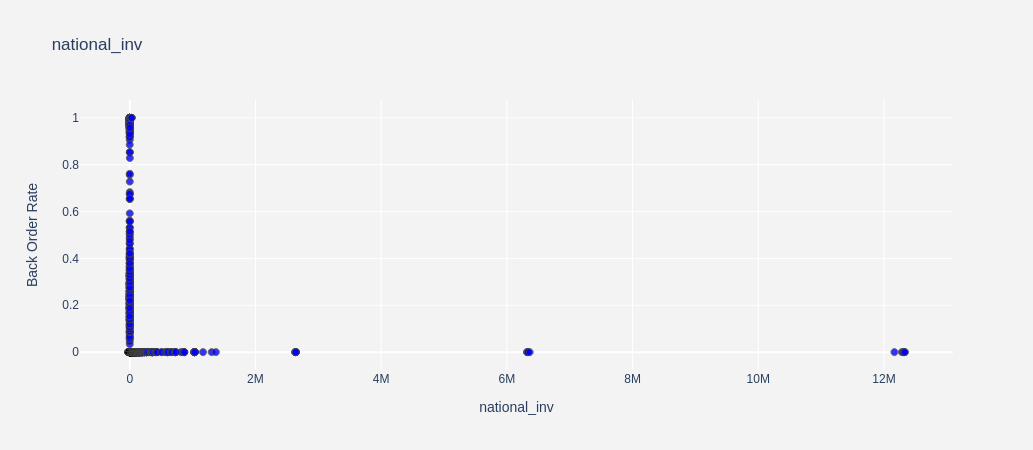

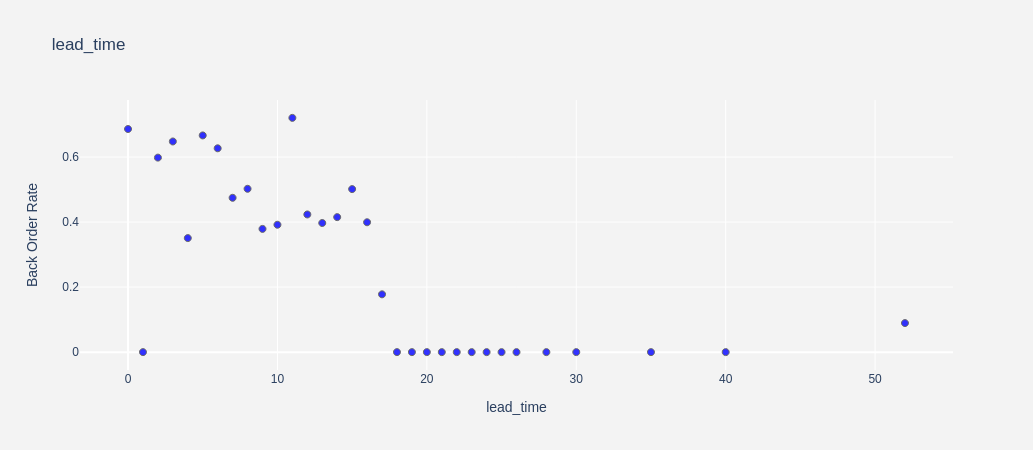

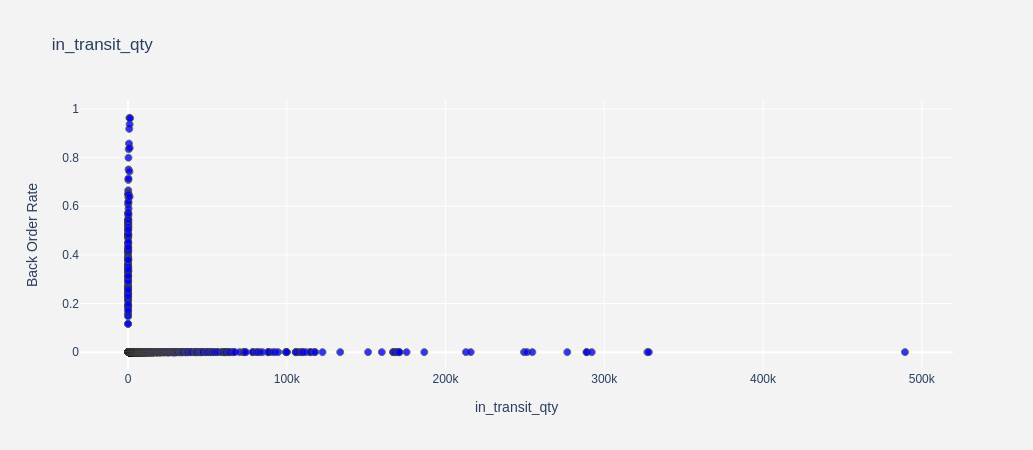

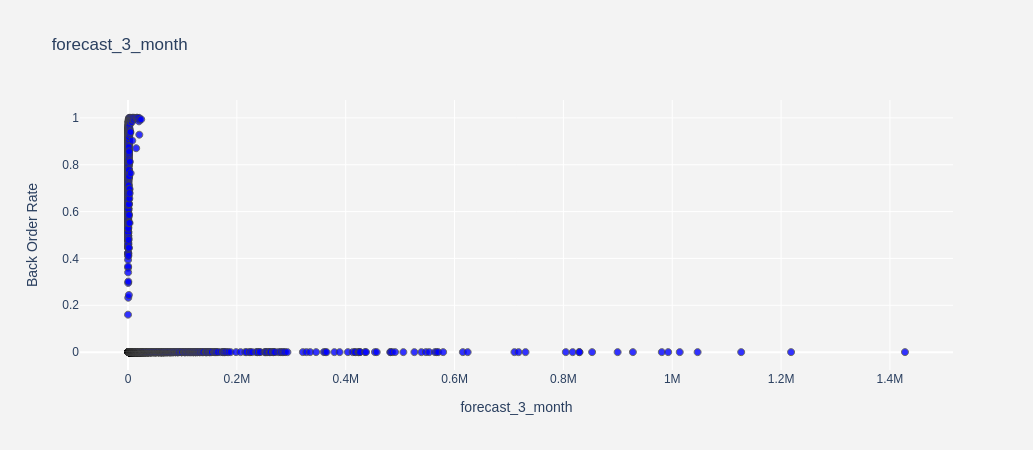

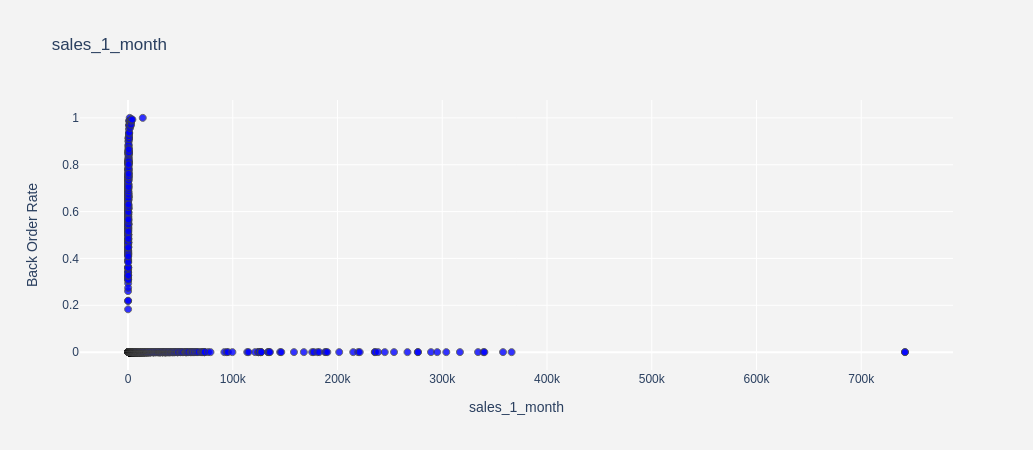

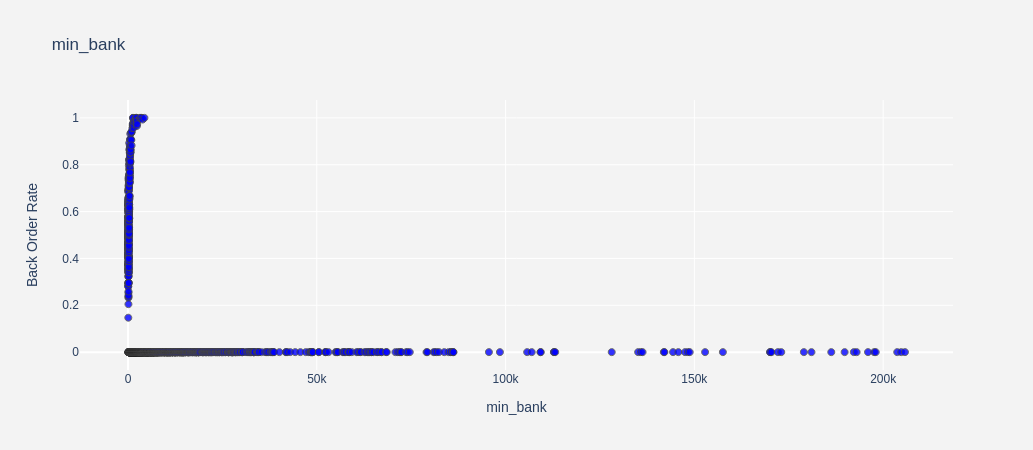

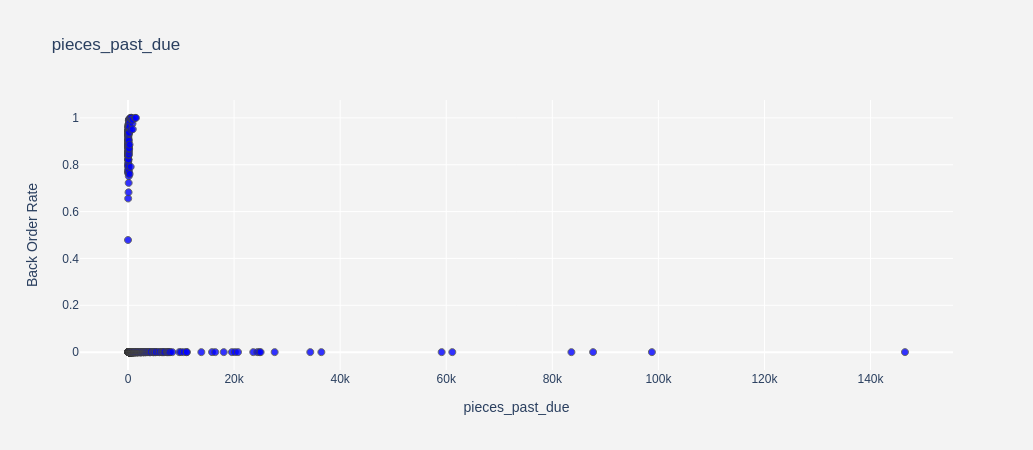

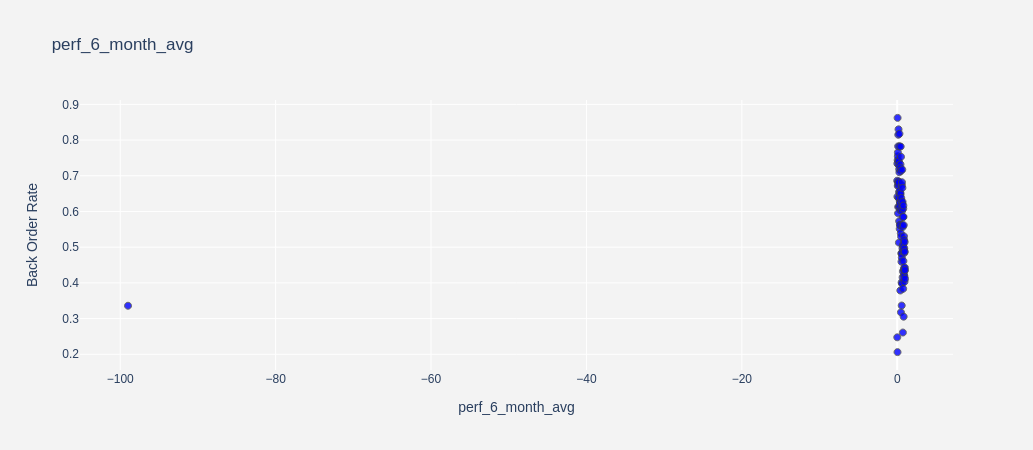

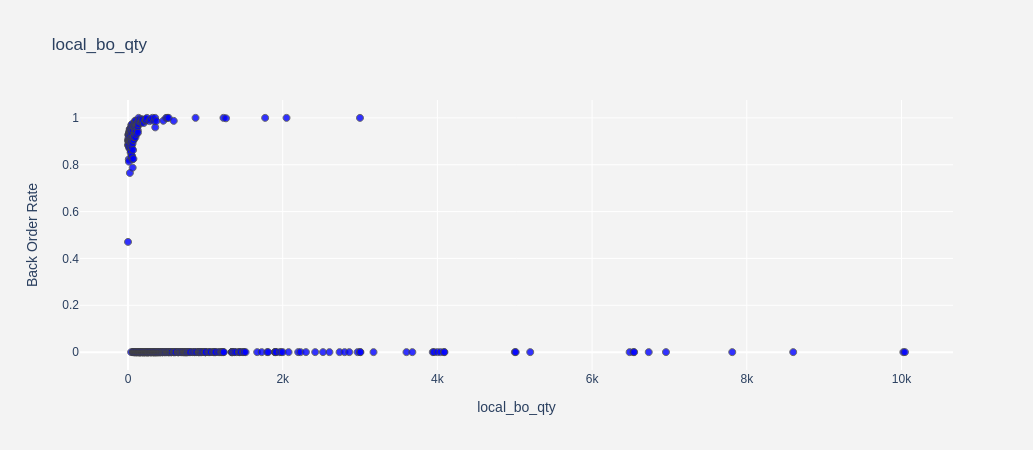

In [12]:
for col in numericals:
    df_plot = df.groupby(col).went_on_backorder_Yes.mean().reset_index()
    plot_data = [
        go.Scatter(
            x=df_plot[col],
            y=df_plot['went_on_backorder_Yes'],
            mode='markers',
            name='Low',
            marker= dict(size= 7,
                line= dict(width=1),
                color= 'blue',
                opacity= 0.8
           ),
        )
    ]
    plot_layout = go.Layout(
            yaxis= {'title': "Back Order Rate"},
            xaxis= {'title': col},
            title= col,
            plot_bgcolor  = "rgb(243,243,243)",
            paper_bgcolor  = "rgb(243,243,243)",
    )
    fig = go.Figure(data=plot_data, layout=plot_layout)
    pyoff.iplot(fig)

No obvious relationships.

We'll do the following to create groups of our numerical features:

    1. Use the Elbow Method to identify the appropriate number of clusters
    2. Applying K-means logic to the selected column and change the naming
    3. Observe the profile of clusters

In [12]:
'''Define function to order clusters
'''
def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

In [13]:
!free -m

              total        used        free      shared  buff/cache   available
Mem:           9041        3801        1181         159        4058        4780
Swap:          2047           0        2047


## national_inv

In [268]:
#get feature descriptive stats
analysis_df.national_inv.describe()

count    1519073.000000
mean         495.992439
std        29067.123473
min       -27256.000000
25%            4.000000
50%           15.000000
75%           80.000000
max     12334404.000000
Name: national_inv, dtype: float64

'national_inv' seem to potentially have a lot of outliers.

75% of the data is below 80.00, while the maximum value is around 12mil.

Let's generate a dataframe of only columns we need for our analysis.

In [322]:
national_inv_df = analysis_df[['national_inv', 'went_on_backorder_Yes']]

print(national_inv_df.shape)

(1519073, 2)


In [323]:
#dropna
national_inv_df = national_inv_df.dropna()

print(national_inv_df.shape)

(1519073, 2)


Notice we have positive as well as negative values of 'national_inv'

To simplify our model, we'll create an indicator variable for negative inventory and transform all values to thier absolute values.

We'll therefore add a column of absolute values to our analysis dataframe.

In [324]:
#get absolute values of national_inv
national_inv_df['national_inv_abs'] = national_inv_df['national_inv'].abs()

print(national_inv_df.shape)

(1519073, 3)


In [325]:
national_inv_df.sample(10)

national_inv  went_on_backorder_Yes  national_inv_abs
736369      13.000000                      0         13.000000
776561      71.000000                      0         71.000000
188594      30.000000                      0         30.000000
1212573     11.000000                      0         11.000000
361388     112.000000                      0        112.000000
953434      12.000000                      0         12.000000
488045     335.000000                      0        335.000000
1284451      1.000000                      0          1.000000
1381708    366.000000                      0        366.000000
1058874      8.000000                      0          8.000000

In [326]:
national_inv_df.describe().T

count       mean          std           min  \
national_inv          1519073.000000 495.992439 29067.123473 -27256.000000   
went_on_backorder_Yes 1519073.000000   0.006691     0.081524      0.000000   
national_inv_abs      1519073.000000 496.772465 29067.110153      0.000000   

                           25%       50%       75%             max  
national_inv          4.000000 15.000000 80.000000 12334404.000000  
went_on_backorder_Yes 0.000000  0.000000  0.000000        1.000000  
national_inv_abs      4.000000 15.000000 80.000000 12334404.000000

In [327]:
#get samples
sample_1 = national_inv_df[(national_inv_df['went_on_backorder_Yes'] == 1)]
sample_2 = national_inv_df[(national_inv_df['went_on_backorder_Yes'] == 0)]

sample_1.shape, sample_2.shape

((10164, 3), (1508909, 3))

In [328]:
#fix sample sizes
sample_2 = sample_2.sample(10164)

In [329]:
#combine sample dataframes
samples = [sample_1, sample_2]

allSamples = pd.concat(samples)

print(allSamples.shape)

(20328, 3)


In [332]:
allSamples.sample(10)

national_inv  went_on_backorder_Yes  national_inv_abs
506352       0.000000                      0          0.000000
701552       0.000000                      1          0.000000
971457     -10.000000                      1         10.000000
1458598      7.000000                      1          7.000000
693238       1.000000                      1          1.000000
733548       1.000000                      0          1.000000
327593      30.000000                      0         30.000000
995398       1.000000                      1          1.000000
748772       5.000000                      0          5.000000
15368       30.000000                      0         30.000000

Let's perform some <b/>clustering analysis</b> using the <b/>k_means algorith</b>to see if we can get some data insights.

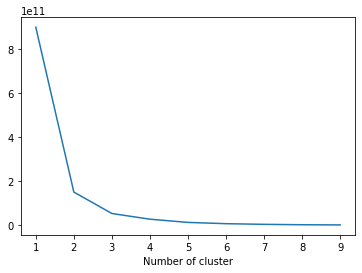

In [333]:
#get k
sse={}
df_cluster = allSamples[['national_inv_abs']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_cluster)
    df_cluster['clusters'] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel('Number of cluster')
plt.show()

In [334]:
#get clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(allSamples[['national_inv_abs']])
allSamples['national_inv_cluster'] = kmeans.predict(allSamples[['national_inv_abs']])

#order clusters
allSamples = order_cluster('national_inv_cluster', 'national_inv_abs',allSamples,True)

#view clusters
allSamples.groupby('national_inv_cluster').national_inv_abs.describe()

count          mean          std           min  \
national_inv_cluster                                                         
0                    20321.000000    151.690222  1227.677542      0.000000   
1                        6.000000 127490.500000 68066.696963  69500.000000   
2                        1.000000 865118.000000          nan 865118.000000   

                               25%           50%           75%           max  
national_inv_cluster                                                          
0                         1.000000      5.000000     26.000000  43381.000000  
1                     81793.750000 119069.500000 128886.250000 255777.000000  
2                    865118.000000 865118.000000 865118.000000 865118.000000

Our k-means analysis seem to be imoacted by outliers in our data.

Let's cap outliers to impact their effect on our analysis and rerun k-means.

In [301]:
'''Function to drop outliers
'''
def cap_data(df, q=0.90):
    for col in df.columns:
        print("capping the ",col)
        if (((df[col].dtype)=='float64') | ((df[col].dtype)=='int64')):
            percentiles = df[col].quantile([0.01,q]).values
            df[col][df[col] <= percentiles[0]] = percentiles[0]
            df[col][df[col] >= percentiles[1]] = percentiles[1]
        else:
            df[col]=df[col]
    return df

In [302]:
#cap outliers
capped_data = cap_data(allSamples, q=.90)

capping the  national_inv
capping the  went_on_backorder_Yes
capping the  national_inv_abs
capping the  national_inv_cluster


In [303]:
#get needed data
capped_data = capped_data[['national_inv', 'national_inv_abs','went_on_backorder_Yes']]

print(capped_data.shape)

(20328, 3)


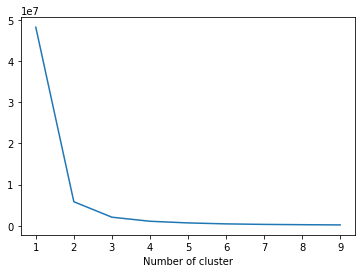

In [305]:
#get k
sse={}
df_cluster = capped_data[['national_inv_abs']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_cluster)
    df_cluster['clusters'] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel('Number of cluster')
plt.show()

In [309]:
#get clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(capped_data[['national_inv_abs']])
capped_data['national_inv_cluster'] = kmeans.predict(capped_data[['national_inv_abs']])

#order clusters
capped_data = order_cluster('national_inv_cluster', 'national_inv_abs',capped_data,True)

#view clusters
capped_data.groupby('national_inv_cluster').national_inv_abs.describe()

count       mean       std        min        25%  \
national_inv_cluster                                                           
0                    15688.000000   5.826555  7.369247   0.000000   0.000000   
1                     2077.000000  61.344247 20.218351  34.000000  43.000000   
2                     2563.000000 146.737807 12.016249 105.000000 152.000000   

                            50%        75%        max  
national_inv_cluster                                   
0                      3.000000   9.000000  33.000000  
1                     57.000000  77.000000 104.000000  
2                    152.000000 152.000000 152.000000

Much better results.

Observe three clear clusters of national inventory means are  formed.

Let's visualize backorder rates of the three clusters.

In [310]:
capped_data['national_inv_cluster'] = capped_data['national_inv_cluster'].replace({0:'Low',1:'Mid', 2:'High'})

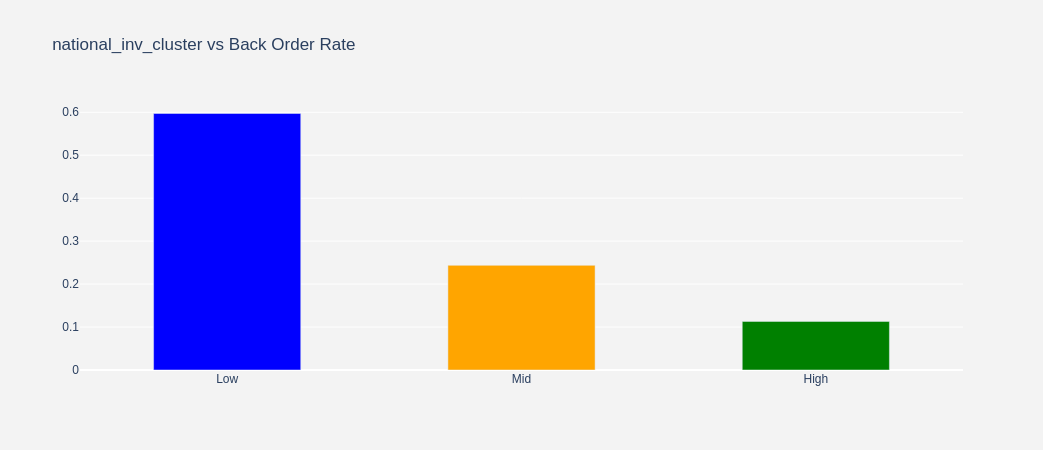

In [311]:
df_plot = capped_data.groupby('national_inv_cluster').went_on_backorder_Yes.mean().reset_index()
plot_data = [
    go.Bar(
        x=df_plot['national_inv_cluster'],
        y=df_plot['went_on_backorder_Yes'],
        width = [0.5, 0.5, 0.5,0.5],
        marker=dict(
        color=['green', 'blue', 'orange','red'])
    )
]

plot_layout = go.Layout(
        xaxis={"type": "category","categoryarray":['Low', 'Mid','High']},
        title='national_inv_cluster vs Back Order Rate',
        plot_bgcolor  = "rgb(243,243,243)",
        paper_bgcolor  = "rgb(243,243,243)",
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

We can clearly see that items with low national inventory levels backordered most.

Let's see how these differences translate to backorder versus non-backorder groups>

In [312]:
capped_data.groupby('went_on_backorder_Yes').national_inv.describe()

count      mean       std        min      25%  \
went_on_backorder_Yes                                                        
0                     10164.000000 46.669717 55.709221 -29.000000 4.000000   
1                     10164.000000  7.637249 24.156712 -29.000000 0.000000   

                            50%       75%        max  
went_on_backorder_Yes                                 
0                     15.000000 84.000000 146.000000  
1                      1.000000  5.000000 146.000000

Observe a lower mean of national inventory items that backordered versus those that did not.

Let's visualize these results for better clarity.

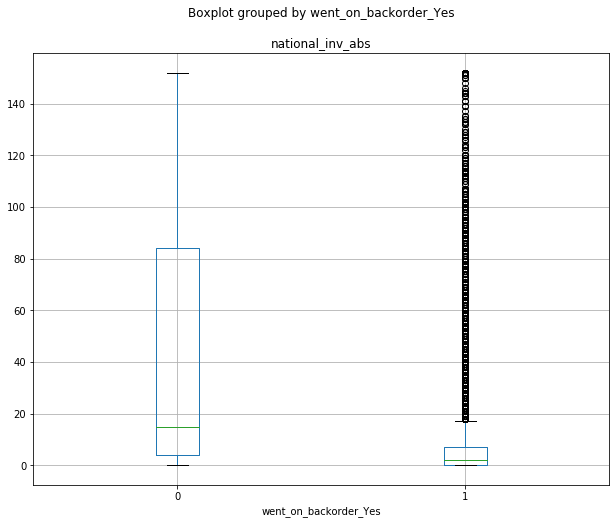

In [313]:
#get boxplots
capped_data.boxplot(column = ['national_inv_abs'], by = 'went_on_backorder_Yes', figsize=(10,8))

Now we can clearly see that the median inventory levels of the two groups are different.

This means low quanities of national_inv are more likely to backorder.

But are these differences significant?

Performing an <b/>independent t-test</b> might help us here.

To perform an independent t-test, the following assumption should be met:
    
    1. Equal sample sizes
    2. Equal variances
    3. Normality of the residuals
    
We know that our samples have equal sample sizes because we corrected sample sizes above.

Therefore the first assumption for performing an independent t-test is met.

In [314]:
#are varaiances the same?
stats.levene(sample_1['national_inv_abs'],sample_2['national_inv_abs'])

LeveneResult(statistic=106.42320346230333, pvalue=6.860329677370288e-25)

<b/>Levene's test</b> confirms unequal variances (p_value<0.05)

That is the second assumption for performing an independent t-test is not met.

We'll run the <b/>Welch's t-test</b> instead, to test if the means between our two groups are the same.

In [318]:
#run Welch's t-test
descriptives, results = rp.ttest(sample_1['national_inv_abs'],\
                                          sample_2['national_inv_abs'], equal_variances=False)

In [319]:
#get summary statistics returned by Welch's t-test
descriptives

Variable            N       Mean          SD        SE  95% Conf.  \
0  national_inv_abs 10164.000000  30.461629  639.536521  6.343560  18.027000   
1  national_inv_abs 10164.000000 336.439394 2872.095731 28.488303 280.596695   
2          combined 20328.000000 183.450512 2086.184126 14.632055 154.770504   

    Interval  
0  42.896258  
1 392.282093  
2 212.130519

Again we can see that the means between the groups are different.

Let's get our test results

In [320]:
print(results)

                                      Welch's t-test      results
0  Difference (national_inv_abs - national_inv_ab...  -305.977800
1                              Degrees of freedom =  11168.352600
2                                               t =    -10.483700
3                           Two side test p value =      0.000000
4                          Difference < 0 p value =      0.000000
5                          Difference > 0 p value =      1.000000
6                                       Cohen's d =     -0.147100
7                                       Hedge's g =     -0.147100
8                                   Glass's delta =     -0.478400
9                                               r =      0.098700


The Welch's test returned a sigificant test statistic(p_value<0.05).

This means the difference in means between backorder versus non backorder groups is significant and therefore <b/>national inventory levels impact backorder.</b>

We'll make note of this an <b/>create an indicator variable inv_less_than_median</b> during feature engineering.

## lead_time

In [335]:
#get descriptive stats on feature
analysis_df['lead_time'].describe()

count   1428211.000000
mean          7.868617
std           7.050977
min           0.000000
25%           4.000000
50%           8.000000
75%           9.000000
max          52.000000
Name: lead_time, dtype: float64

In [336]:
#get feature dataframe
lead_time_df = analysis_df[['lead_time', 'went_on_backorder_Yes']]

print(lead_time_df.shape)

(1519073, 2)


In [346]:
#impute missing with median (note: we know lead-time has missing from previous analysis)
lead_time_df.fillna(lead_time_df.median(), inplace=True)

#count nulls
print(lead_time_df['lead_time'].isnull().sum())

0


In [347]:
#get samples
sample_1 = lead_time_df[(lead_time_df['went_on_backorder_Yes'] == 1)]
sample_2 = lead_time_df[(lead_time_df['went_on_backorder_Yes'] == 0)]

print(sample_1.shape, sample_2.shape)

(10164, 2) (1508909, 2)


In [348]:
#fix sample sizes
sample_2 = sample_2.sample(10164)

print(sample_1.shape, sample_2.shape)

(10164, 2) (10164, 2)


In [349]:
#combinesample dataframes
samples = [sample_1, sample_2]

allSamples = pd.concat(samples)

print(allSamples.shape)

(20328, 2)


In [351]:
allSamples.sample(10)

lead_time  went_on_backorder_Yes
929938    8.000000                      1
1444861   2.000000                      0
1124558   8.000000                      0
202895    8.000000                      0
17425     8.000000                      0
253310    3.000000                      1
1515877   2.000000                      0
247723    8.000000                      0
1505647   8.000000                      0
639569    8.000000                      1

Let's perform some clustering analysis using k_means to see if we can get some data insights

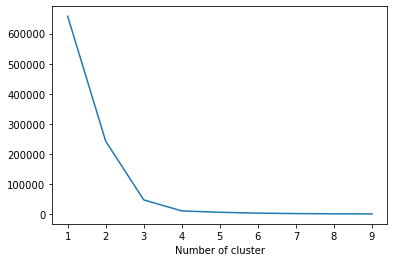

In [352]:
#get k
sse={}
df_cluster = allSamples[['lead_time']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_cluster)
    df_cluster['clusters'] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel('Number of cluster')
plt.show()

In [357]:
#get clusters
kmeans = KMeans(n_clusters=4)
kmeans.fit(allSamples[['lead_time']])
allSamples['lead_time_cluster'] = kmeans.predict(allSamples[['lead_time']])

#order clusters
allSamples = order_cluster('lead_time_cluster', 'lead_time',allSamples,True)

#view clusters
allSamples.groupby('lead_time_cluster').lead_time.describe()

count      mean      std       min       25%  \
lead_time_cluster                                                       
0                  6922.000000  2.368391 0.904851  0.000000  2.000000   
1                 10751.000000  8.124454 0.421898  6.000000  8.000000   
2                  2451.000000 12.403917 1.185649 11.000000 12.000000   
3                   204.000000 52.000000 0.000000 52.000000 52.000000   

                        50%       75%       max  
lead_time_cluster                                
0                  2.000000  2.000000  5.000000  
1                  8.000000  8.000000 10.000000  
2                 12.000000 12.000000 26.000000  
3                 52.000000 52.000000 52.000000

Four clusters formed

Let's view the backorder rate for each cluster

In [359]:
allSamples['lead_time_cluster'] = allSamples['lead_time_cluster'].replace({0:'Low',1:'Mid',2:'High',3:'Highest'})

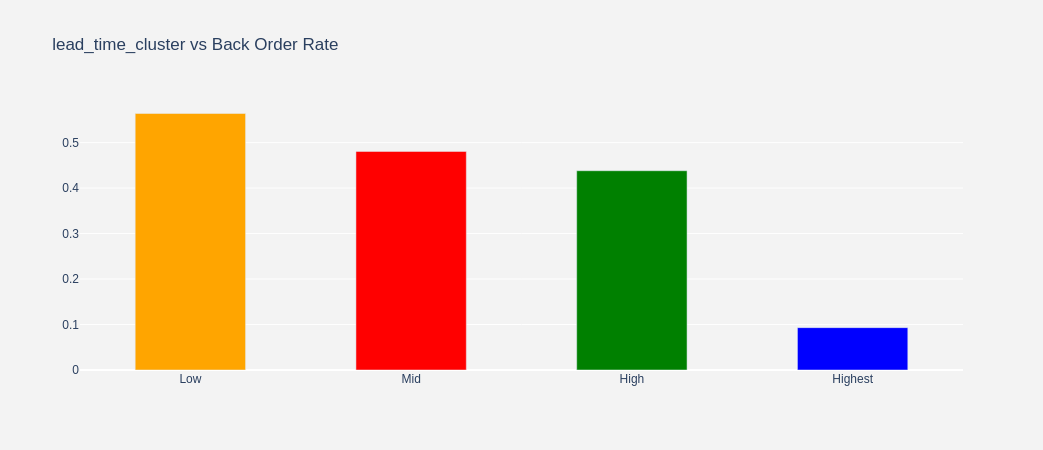

In [360]:
df_plot = allSamples.groupby('lead_time_cluster').went_on_backorder_Yes.mean().reset_index()
plot_data = [
    go.Bar(
        x=df_plot['lead_time_cluster'],
        y=df_plot['went_on_backorder_Yes'],
        width = [0.5, 0.5, 0.5,0.5],
        marker=dict(
        color=['green', 'blue', 'orange','red'])
    )
]

plot_layout = go.Layout(
        xaxis={"type": "category","categoryarray":['Low','Mid','High', 'Highest']},
        title='lead_time_cluster vs Back Order Rate',
        plot_bgcolor  = "rgb(243,243,243)",
        paper_bgcolor  = "rgb(243,243,243)",
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

It apears that more items with short lead time go on back order.

Let's view how this difference impacted backorder versus non-backorder items.

In [362]:
#group data by backorder and describe leadtime
lead_time_df.groupby('went_on_backorder_Yes')['lead_time'].describe()

count     mean      std      min      25%  \
went_on_backorder_Yes                                                      
0                     1508909.000000 7.886611 6.850810 0.000000 4.000000   
1                       10164.000000 6.371704 4.030652 0.000000 2.000000   

                           50%      75%       max  
went_on_backorder_Yes                              
0                     8.000000 8.000000 52.000000  
1                     8.000000 8.000000 52.000000

Observe a lower mean lead_time for items that backordered.

Let's visualize these findings.

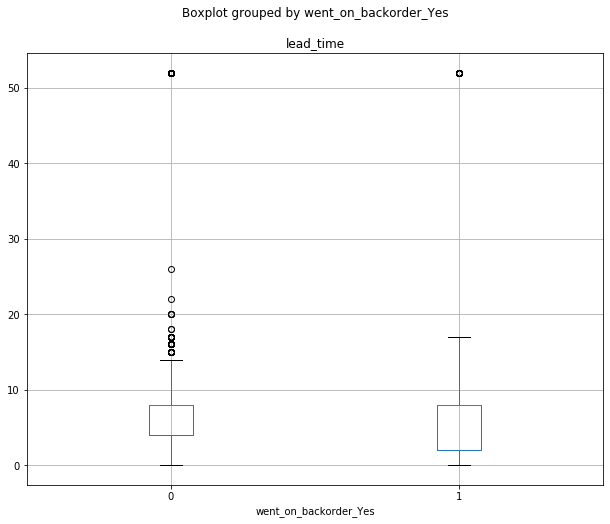

In [364]:
#get boxplots
allSamples.boxplot(column = ['lead_time'], by = 'went_on_backorder_Yes', figsize=(10,8))

It is not very clear from the box plots above if the medians are indeed different.

That is, we cannot tell whether the median lead time of items that went on back order is significantly lower than the lead times of itms that did not backorder. 

In other words, we can't tell whether items with lower lead times tend to go on backorder.

Let's perform an <b/>independent t-test</b> to assess whether their is a statistically significant difference in mean lead times of backorder versus non-backorder items.

Before performing the t-test, we need to verify that assumptions for the test are met by our data.

    1. Variances of the two sample groups should be the same
        We verfy this by performing the Levene's test
    2. Ensure the distributions of the residuals between the two sample groups follow a normal distribution 
        - There are a number of ways that we can evaluate the distributions of our residuals
            we first calculate the residuals from the two gropus by calculating the differences between the samples

In [365]:
#are varaiances the same?
stats.levene(sample_1['lead_time'],sample_2['lead_time'])

LeveneResult(statistic=16.697636791209902, pvalue=4.4003769774983636e-05)

Note that the null hypothesis for the Levene's test is that the variances are the same

Since our p_value is less than our significance level of 0.05, we <b/>reject the null hypothesis that the variances from our two samples are the same.</b>

Our first assumption for performing an indepenndent t-test is not met.

(array([1.630e+02, 2.200e+01, 1.000e+00, 8.100e+01, 4.053e+03, 5.629e+03,
        1.960e+02, 0.000e+00, 0.000e+00, 1.900e+01]),
 array([-6.34356384, -5.06233948, -3.78111513, -2.49989077, -1.21866641,
         0.06255795,  1.34378231,  2.62500667,  3.90623102,  5.18745538,
         6.46867974]),
 <a list of 10 Patch objects>)

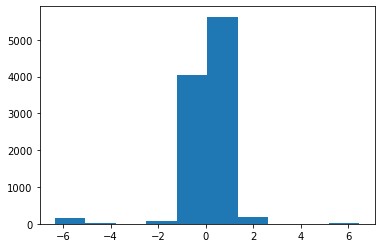

In [366]:
#get residuals
diff = scale(np.array(sample_1['lead_time']) - np.array(sample_2['lead_time']))

#plot residuals
plt.hist(diff)

From the plot we see that the residuals do not follow a normal (gaussian) distribution.

Therefore our second <b/>assumption for performing the independent t-test is not met.<>/b

However, we'll verify this by performing other more formal statistical checks

    - We'll use a QQ plot (aka Probability plot) using stats.probplot()
    
        Note that stats.problots() generates a probability plot using the sample data passed into it.
        
        Here we want to evaluate the residuals between our two groups which are lead times on backorders versus non back ordered items
        
        The theoretical distribution that we want to evaluate our residuals here is the normal distribution
        
        The QQ plot compares how the distributions of our residuals compare with normal distributed data

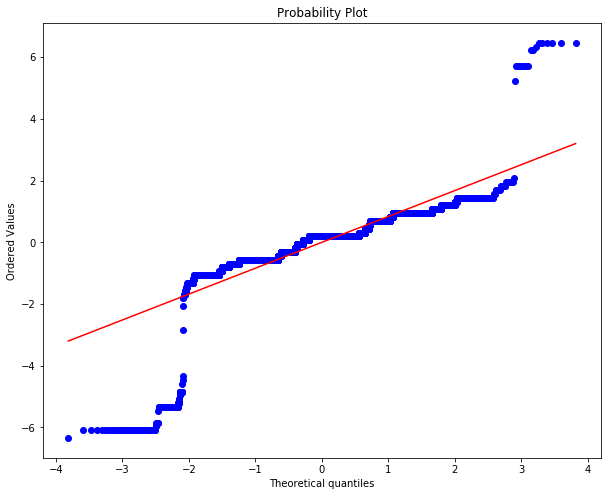

In [368]:
plt.figure(figsize = (10,8))

stats.probplot(diff, plot=plt, dist = 'norm')

plt.show()

From the above plot we see that our residuals do not follow a normal distribution for the most part. 

Our closely follow a normal distribution except for each end of the plot (at greater than 1 standard deviations away from the mean of either side of the plot), the data does not follow the red line which is a plot of quarntile information for normally distributed data.

Therefore we cannot accept the second assumption for a t-test that our residuals are normally distributed as being satisfied.

Let's also verify this same assumption using <b/>Shapiro-Wilk test</b> for normality

In [369]:
#run shapiro test
stats.shapiro(diff)

ShapiroResult(statistic=0.7033497095108032, pvalue=0.0)

The shapiro test results return a significant test statistic(p-value < 0.05), meaning at a 0.05 level of significance we have to accept the alternate hypothesis of this test that <b/>our residuals are not normally distributed.</b>

However, this could be due to the presence of lead time outliers in our dataset.

Therefore, although  all our assumptions for the t-test of independence are not satisfied, we'll run our test but evaluate our results with care since these results could be impacted by the presence of lead time outliers in our data.

In [370]:
#run t-test (actually a z-test form of t-test because we have a large sample, and our data is gausian)
stats.ttest_ind(sample_1['lead_time'], sample_2['lead_time'])

Ttest_indResult(statistic=-18.94178474734031, pvalue=2.4902086963310544e-79)

Our T-test results show a p-value that is less than our level of statistical significance (0.05), meaning we should reject the null hypothesis of the t-test(means are the same) and accept the alternate hypothesis (means are different)

Therefore, we can conclude that lead-time significantly impacts whether an item went on back-order.

That is, we'll add an indicator variable for whether the lead time is above or below the mean lead-time.

But we should interpret these results with care since <b/>two assumptions for performing a t-test were not met.</b>

We'll therefore run a <b/>Welch's test</b> instead.

Let's try to remove outliers from lead-time and evaluate results

In [371]:
#run Welch's test
descriptives, results = rp.ttest(sample_1['lead_time'],\
                                          sample_2['lead_time'], equal_variances=False)

In [373]:
#get summary stats returned by Welch's t-test
descriptives

Variable            N     Mean       SD       SE  95% Conf.  Interval
0  lead_time 10164.000000 6.371704 4.030652 0.039980   6.293335  6.450073
1  lead_time 10164.000000 7.869736 6.879371 0.068236   7.735979  8.003493
2   combined 20328.000000 7.120720 5.687305 0.039890   7.042533  7.198907

The means are different between the two sample groups as we verified earlier.

Lets check the results from Welch's test to see if this difference is significant.

In [375]:
#get Welch's t_test results
print(results)

                          Welch's t-test      results
0  Difference (lead_time - lead_time) =     -1.498000
1                  Degrees of freedom =  16405.004100
2                                   t =    -18.941800
3               Two side test p value =      0.000000
4              Difference < 0 p value =      0.000000
5              Difference > 0 p value =      1.000000
6                           Cohen's d =     -0.265700
7                           Hedge's g =     -0.265700
8                       Glass's delta =     -0.371700
9                                   r =      0.146300


Welch's t-test has returned a significant p_value(<0.05), meaning we should reject Welche's test  null hypothsis and conclude that the mean lead times between backorder and non-backorders are significantly different. 

That is we have statistically confirmed that <b/>lead_time impacts backorder.</b>

We'll not the info and <b/>create an indicator variable 'less than mean or median lead time'</b> during feature engineering.

## in_transit_qty

In [378]:
#get descriptive stats on feature
analysis_df['in_transit_qty'].describe()

count   1519073.000000
mean         43.605469
std        1285.816749
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      489408.000000
Name: in_transit_qty, dtype: float64

About 75% of the data is zeros

Let's get a dataframe of the features we need for analysis.

In [379]:
in_transit_df = analysis_df[['in_transit_qty', 'went_on_backorder_Yes']]

print(in_transit_df.shape)

(1519073, 2)


In [380]:
#dropNa
in_transit_df = in_transit_df.dropna(axis=0)

print(in_transit_df.shape)

(1519073, 2)


In [381]:
#get samples
sample_1 = in_transit_df[(in_transit_df['went_on_backorder_Yes'] == 1)]
sample_2 = in_transit_df[(in_transit_df['went_on_backorder_Yes'] == 0)]

print(sample_1.shape, sample_2.shape)

(10164, 2) (1508909, 2)


In [382]:
#fix sample sizes
sample_2 = sample_2.sample(10164)

print(sample_1.shape, sample_2.shape)

(10164, 2) (10164, 2)


In [383]:
#combine sample dataframes
samples = [sample_1, sample_2]

allSamples = pd.concat(samples)

print(allSamples.shape)

(20328, 2)


In [384]:
allSamples.sample(10)

in_transit_qty  went_on_backorder_Yes
14554          0.000000                      0
486503         0.000000                      0
143732         0.000000                      0
1224846        0.000000                      1
613387         0.000000                      0
889748         0.000000                      0
97843          0.000000                      0
718354         0.000000                      1
609191       107.000000                      0
469895         1.000000                      0

Let's perform some <b/>clustering analysis</b> using k_means to see if we can get some data insights

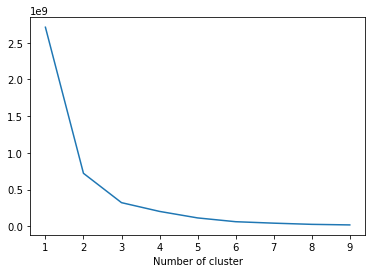

In [385]:
#Get k
sse={}
df_cluster = allSamples[['in_transit_qty']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_cluster)
    df_cluster["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [386]:
#get clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(allSamples[['in_transit_qty']])
allSamples['in_transit_qty_cluster'] = kmeans.predict(allSamples[['in_transit_qty']])

#order clusters
allSamples = order_cluster('in_transit_qty_cluster', 'in_transit_qty',allSamples,True)

#view clusters formed
allSamples.groupby('in_transit_qty_cluster').in_transit_qty.describe()

count         mean         std          min  \
in_transit_qty_cluster                                                      
0                      20300.000000    10.540837   75.018637     0.000000   
1                         25.000000  4010.840000 2187.575021  2112.000000   
2                          3.000000 25764.666667 6824.834162 20412.000000   

                                25%          50%          75%          max  
in_transit_qty_cluster                                                      
0                          0.000000     0.000000     0.000000  1922.000000  
1                       2450.000000  3200.000000  4828.000000  9312.000000  
2                      21922.000000 23432.000000 28441.000000 33450.000000

Our k-means analysis seem to be impacted by outliers in our data.

Let's cap outliers to limit their effect on our analysis and rerun k-means.

In [387]:
#cap outliers
capped_data = cap_data(allSamples, q=.9)

capping the  in_transit_qty
capping the  went_on_backorder_Yes
capping the  in_transit_qty_cluster


In [388]:
#get needed data
capped_data = capped_data[['in_transit_qty', 'went_on_backorder_Yes']]

print(capped_data.shape)

(20328, 2)


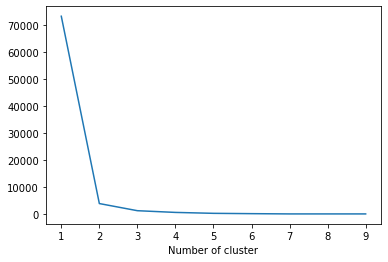

In [389]:
#Get k
sse={}
df_cluster = capped_data[['in_transit_qty']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_cluster)
    df_cluster["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [390]:
#get clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(capped_data[['in_transit_qty']])
capped_data['in_transit_qty_cluster'] = kmeans.predict(capped_data[['in_transit_qty']])

#order clusters
capped_data = order_cluster('in_transit_qty_cluster', 'in_transit_qty',capped_data,True)

#view clusters formed
capped_data.groupby('in_transit_qty_cluster').in_transit_qty.describe()

count     mean      std      min      25%  \
in_transit_qty_cluster                                                    
0                      17417.000000 0.028019 0.165031 0.000000 0.000000   
1                        672.000000 2.842262 0.807269 2.000000 2.000000   
2                       2239.000000 5.942832 0.232216 5.000000 6.000000   

                            50%      75%      max  
in_transit_qty_cluster                             
0                      0.000000 0.000000 1.000000  
1                      3.000000 4.000000 4.000000  
2                      6.000000 6.000000 6.000000

3 clusters formed based on the means of quantity in transit

Let's view the backorder rate for each cluster

In [392]:
capped_data['in_transit_qty_cluster'] = capped_data["in_transit_qty_cluster"].\
replace({0:'Low',1:'Mid',2:'High'})

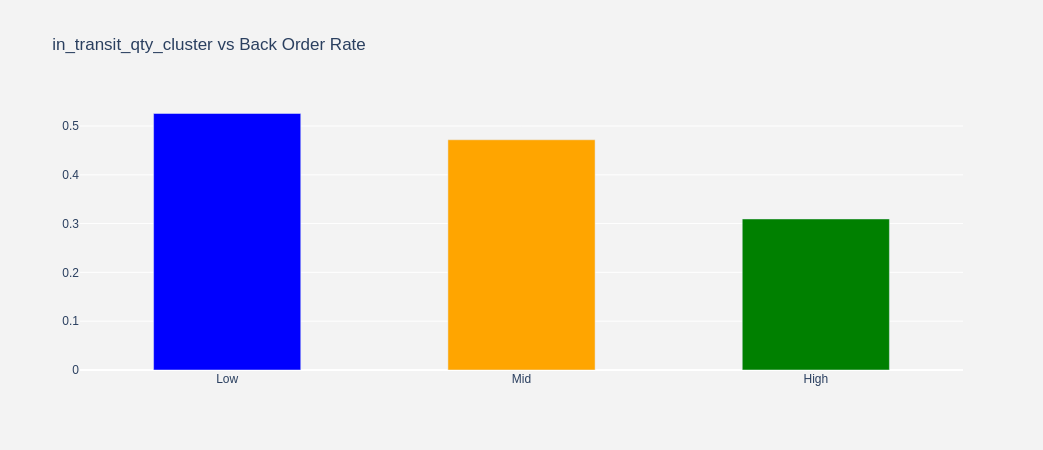

In [393]:
df_plot = capped_data.groupby('in_transit_qty_cluster').went_on_backorder_Yes.mean().reset_index()
plot_data = [
    go.Bar(
        x=df_plot['in_transit_qty_cluster'],
        y=df_plot['went_on_backorder_Yes'],
        width = [0.5, 0.5, 0.5,0.5],
        marker=dict(
        color=['green', 'blue', 'orange','red'])
    )
]

plot_layout = go.Layout(
        xaxis={"type": "category","categoryarray":['Low','Mid','High']},
        title='in_transit_qty_cluster vs Back Order Rate',
        plot_bgcolor  = "rgb(243,243,243)",
        paper_bgcolor  = "rgb(243,243,243)",
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

Here we see that low quanities in transit from supplier are associated with highest back order rates

Is this difference statistically significant or just by chance?

Again we'll perform an independent t-test to answer this question.

In [394]:
#group data by backorder and describe in_transity_qty
allSamples.groupby('went_on_backorder_Yes')['in_transit_qty'].describe()

count     mean      std      min      25%  \
went_on_backorder_Yes                                                    
0                     10164.000000 1.023908 2.159332 0.000000 0.000000   
1                     10164.000000 0.521153 1.560434 0.000000 0.000000   

                           50%      75%      max  
went_on_backorder_Yes                             
0                     0.000000 0.000000 6.000000  
1                     0.000000 0.000000 6.000000

The mean of in-transit quantity between items that backorderd and those that did not are different.

That is the quantity in transit appears to impact back order.

Let's view boxplots to get more clarity on the relationship.

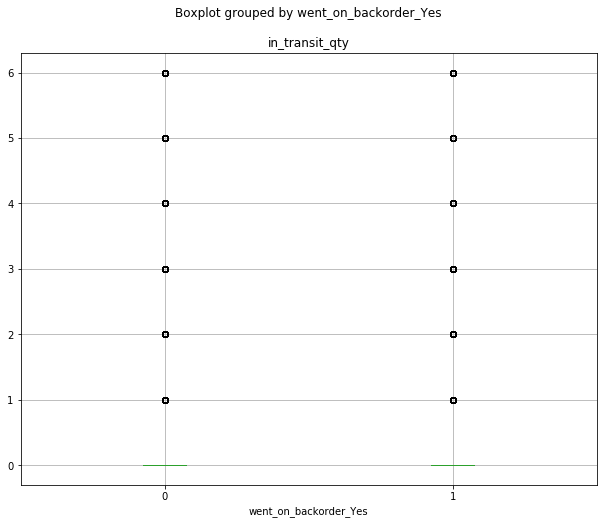

In [395]:
#view box plots
allSamples.boxplot(column=['in_transit_qty'], by='went_on_backorder_Yes', figsize=(10,8))

Not quite what we expected.

Let's investigate why our code returned a strange plot?

In [396]:
allSamples.sample(10)

in_transit_qty  went_on_backorder_Yes  in_transit_qty_cluster
14811        0.000000                      0                       0
6339         0.000000                      1                       0
11609        0.000000                      0                       0
1343         2.000000                      1                       0
13722        0.000000                      0                       0
10820        3.000000                      0                       0
9747         0.000000                      1                       0
11182        1.000000                      0                       0
14893        0.000000                      0                       0
5689         0.000000                      1                       0

In [397]:
print(allSamples.shape)

(20328, 3)


In [398]:
#get 5 largest "in_transit_qty" values
allSamples.nlargest(5, 'in_transit_qty')

in_transit_qty  went_on_backorder_Yes  in_transit_qty_cluster
0         6.000000                      1                       0
14        6.000000                      1                       0
43        6.000000                      1                       0
48        6.000000                      1                       0
58        6.000000                      1                       0

In [399]:
#get 5 smallest "in_transit_qty" values
allSamples.nsmallest(5, 'in_transit_qty')

in_transit_qty  went_on_backorder_Yes  in_transit_qty_cluster
1        0.000000                      1                       0
2        0.000000                      1                       0
3        0.000000                      1                       0
4        0.000000                      1                       0
5        0.000000                      1                       0

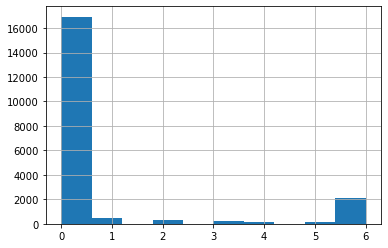

In [400]:
#view sample distributions
allSamples.in_transit_qty.hist()

In [401]:
#get in_transit_qty unique values
allSamples.in_transit_qty.unique()

array([6., 0., 2., 1., 5., 4., 3.])

After capping all outliers, <b/>in_transit_quantity appears to be a discrete variable.</b>

We'll treat in_transit_qty as a categorical variable going forward.

In [402]:
#is the back_order rate different by in_transit_qty category?
allSamples.groupby('in_transit_qty').went_on_backorder_Yes.mean().reset_index()

in_transit_qty  went_on_backorder_Yes
0        0.000000               0.524307
1        1.000000               0.569672
2        2.000000               0.453571
3        3.000000               0.477064
4        4.000000               0.494253
5        5.000000               0.382812
6        6.000000               0.305069

The means appear to different per group. 

Let's visualize the results to ascertain that is the case.

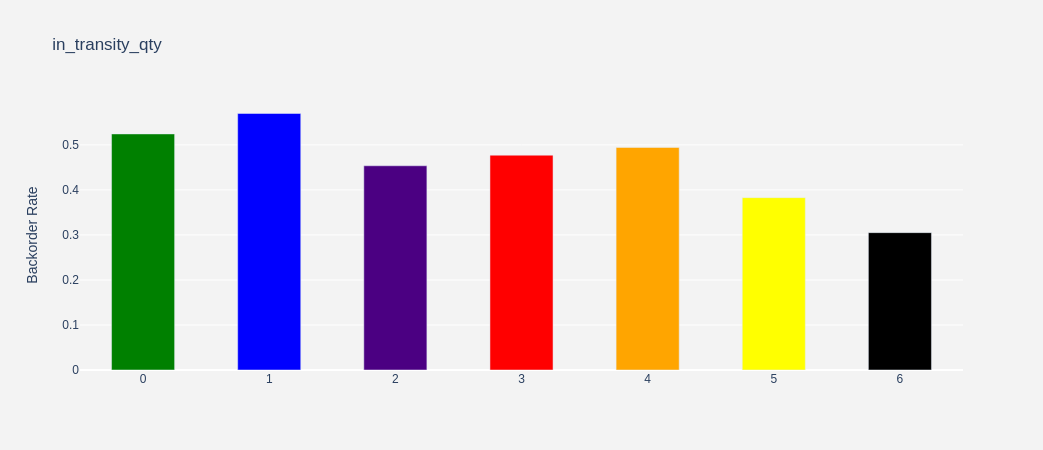

In [403]:
df_plot = allSamples.groupby('in_transit_qty').went_on_backorder_Yes.mean().reset_index()
plot_data = [
    go.Bar(
        x=df_plot['in_transit_qty'],
        y=df_plot['went_on_backorder_Yes'],
        width = [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
        marker=dict(
        color=['green', 'blue', 'indigo', 'red', 'orange', 'yellow'])
    )
]
plot_layout = go.Layout(
        xaxis={"type": "category"},
        yaxis={"title": "Backorder Rate"},
        title='in_transity_qty',
        plot_bgcolor  = 'rgb(243,243,243)',
        paper_bgcolor  = 'rgb(243,243,243)',
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

We can see from above that in transit quantity impacts backorder

But, are these differences significant?

Let's run a <b/>Pearson's chi-squared test</b> to ascertain whether in transit quantity impacts backorder.

The Pearson's Chi-squared test helps us test whether two categorical variables are independent of each other.

Let's get a dataframe of the columns of interest.

In [404]:
#get needed data for chi2 test
in_transit_data = allSamples[['in_transit_qty', 'went_on_backorder_Yes']]

in_transit_data.head()

in_transit_qty  went_on_backorder_Yes
0        6.000000                      1
1        0.000000                      1
2        0.000000                      1
3        0.000000                      1
4        0.000000                      1

A histogram gives us an idea of how different groups of in transit quantity are distributed in our data.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5f7335a450>]],
      dtype=object)

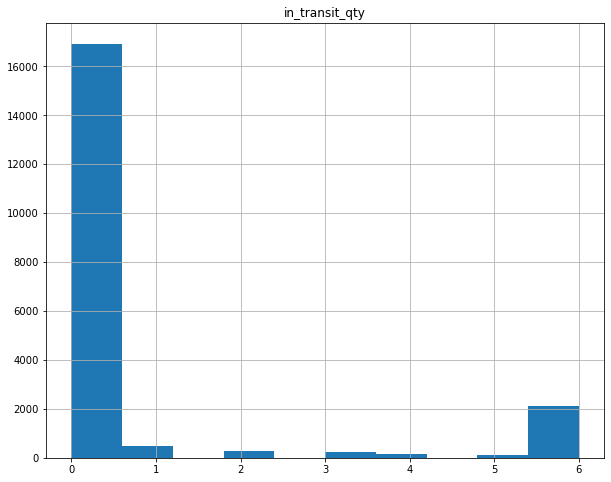

In [405]:
in_transit_data[['in_transit_qty']].hist(figsize=(10,8))

We see that most of the items in our dataset are of group '0'

Let's view the data we're working with in a tabular form to get a slightly different view of our data.

In [406]:
df_for_obs = pd.crosstab(in_transit_data['went_on_backorder_Yes'], in_transit_data['in_transit_qty'])

df_for_obs

in_transit_qty         0.000000  1.000000  2.000000  3.000000  4.000000  \
went_on_backorder_Yes                                                     
0                          8053       210       153       114        88   
1                          8876       278       127       104        86   

in_transit_qty         5.000000  6.000000  
went_on_backorder_Yes                      
0                            79      1467  
1                            49       644

The mean of quantities in transit is different by grouping.

In [407]:
#run chi2 test
chi2, p_value, degrees_of_freedom, expected_values = chi2_contingency(df_for_obs.values)

In [408]:
#Get chi2
print('Chi2 : {}'.format(round(chi2,2)))

Chi2 : 380.27


In [409]:
#Get p_value
print('p_value : {}'.format(p_value))

p_value : 4.8660089805400377e-79


The p_value is less than our significance level (0.05), indicating that the test statistic is significant.

Therefore we should reject the null hypothesis that the two categorical variables are independent and accept the alternate hypothesis that <b/>the two variables are dependent.</b> 

That is we can confirm with certainty from the chi2 test that <b/>'in_transit_qty' impacts backorder</b>

We'll also make note to <b/>create an indicator variable for in_transit_qty less than 4</b>, as those items with in_transit_qty under 4 tend to backorder most.

Let's validate our chi-squared results

In [410]:
print('The degrees of freedom: {}'.format(degrees_of_freedom))

The degrees of freedom: 6


In [411]:
#get expected values
expected_values

array([[8464.5,  244. ,  140. ,  109. ,   87. ,   64. , 1055.5],
       [8464.5,  244. ,  140. ,  109. ,   87. ,   64. , 1055.5]])

In [412]:
#place expected values in dataframes
expected_df = pd.DataFrame({
    '0': expected_values[0],
    '1': expected_values[1],   
})

In [413]:
#view expected_df
expected_df

0           1
0 8464.500000 8464.500000
1  244.000000  244.000000
2  140.000000  140.000000
3  109.000000  109.000000
4   87.000000   87.000000
5   64.000000   64.000000
6 1055.500000 1055.500000

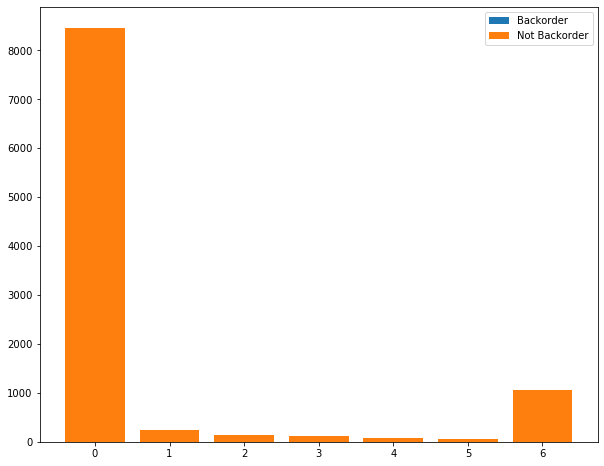

In [414]:
#visualize distribution of expected values
plt.figure(figsize=(10,8))

plt.bar(expected_df.index, expected_df['1'], label='Backorder')
plt.bar(expected_df.index, expected_df['0'], label='Not Backorder')

plt.legend()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5f7352d850>]],
      dtype=object)

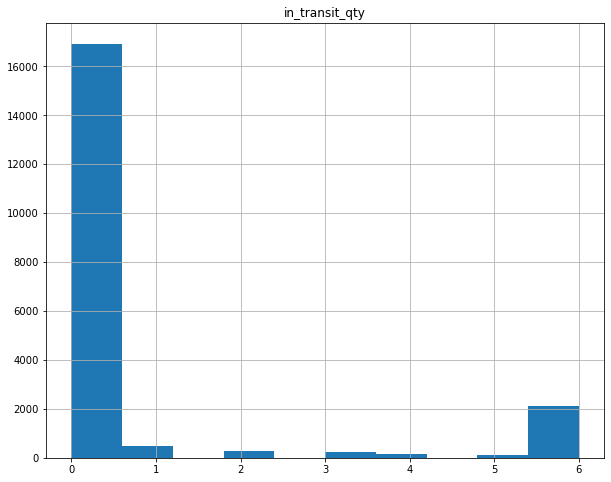

In [415]:
#get histogram of in_transit_qty distribution
capped_data[['in_transit_qty']].hist(figsize=(10,8))

We can observe that the distribution of expected values is similar to the distribution of in_transity_qty values.

Let's visualize what was actually observed by our chi-squared test.

In [416]:
# 1.set up back-order and not-backorder dataframes
intransit_backordered = capped_data[capped_data['went_on_backorder_Yes'] == 1]
intransit_not_backordered = capped_data[capped_data['went_on_backorder_Yes'] == 0]

#drop uneeded columns
intransit_backordered = intransit_backordered.drop('in_transit_qty_cluster', axis=1)
intransit_not_backordered = intransit_not_backordered.drop('in_transit_qty_cluster', axis=1)

# 2. get shape of dataframes
intransit_backordered.shape, intransit_not_backordered.shape

((10164, 2), (10164, 2))

In [417]:
#3. look at sample of back orders
intransit_backordered.sample(10)

in_transit_qty  went_on_backorder_Yes
5692        0.000000                      1
6954        0.000000                      1
6468        0.000000                      1
3003        0.000000                      1
6797        0.000000                      1
591         6.000000                      1
9144        0.000000                      1
4628        0.000000                      1
4055        0.000000                      1
5654        0.000000                      1

Observe that most of items that went on backorder are of in_transit_qty cluster 0

In [418]:
#4. look at sample of non-backorders
intransit_not_backordered.sample(10)

in_transit_qty  went_on_backorder_Yes
13484        0.000000                      0
15746        0.000000                      0
18311        0.000000                      0
16007        0.000000                      0
20142        2.000000                      0
16929        0.000000                      0
19225        0.000000                      0
15549        0.000000                      0
1588         6.000000                      0
15014        0.000000                      0

Observe that items with high in transity qty did not backorder.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5f7354d710>]],
      dtype=object)

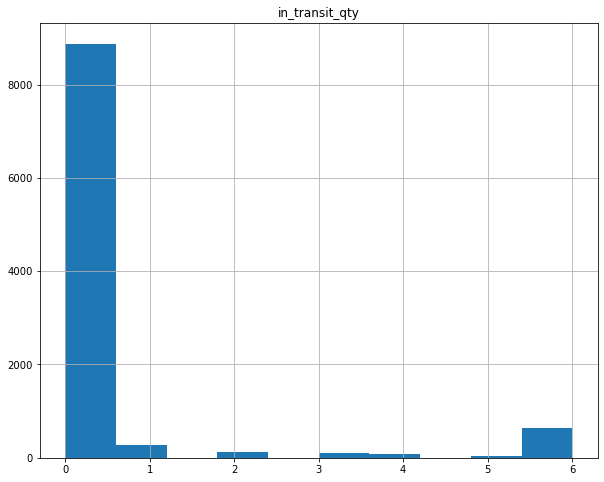

In [419]:
#5. look at histogram of backorders
intransit_backordered[['in_transit_qty']].hist(figsize=(10,8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5f732dc050>]],
      dtype=object)

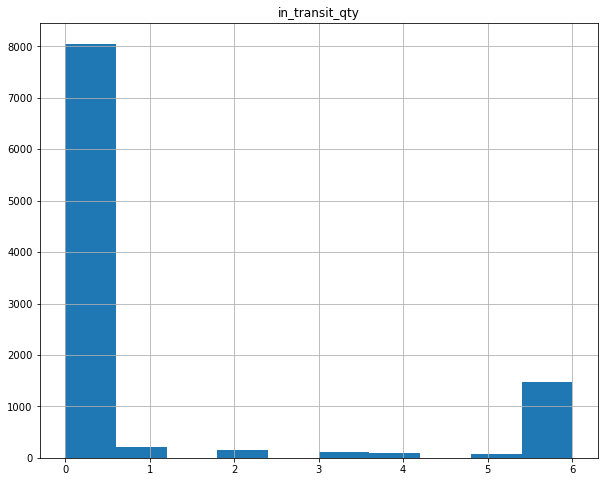

In [420]:
#6. look at histogram of non-backorders
intransit_not_backordered[['in_transit_qty']].hist(figsize=(10,8))

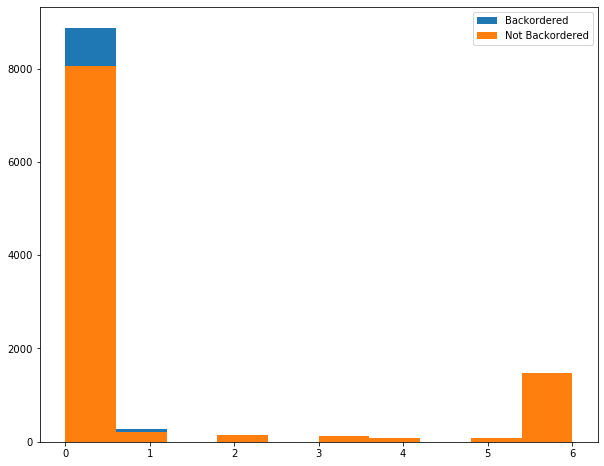

In [421]:
#7. overlay both backorder and non-backoder plots
plt.figure(figsize=(10,8))

plt.hist(intransit_backordered['in_transit_qty'], label='Backordered')
plt.hist(intransit_not_backordered['in_transit_qty'], label='Not Backordered')

plt.legend()

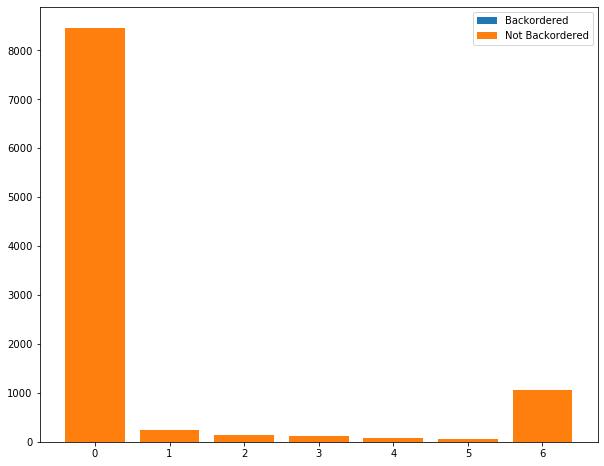

In [422]:
#8. Get histogram plot returned by chi2
plt.figure(figsize=(10,8))

plt.bar(expected_df.index, expected_df['1'], label='Backordered')
plt.bar(expected_df.index, expected_df['0'], label='Not Backordered')

plt.legend()

We can see that our chi-squared test got it right because the two histograms are not the same.

This means the two categorical variables are dependent (alternate hypothesis accepted).

Therefore we have proved statistically that <b/>in_transit_qty impacts backorder</b> according to our data.

<b/>Low quanities in transit tend to backorder most.</b>

We'll <b/>create an indicator variable 'in_transit_less_than_median'</b> during feature engineering. 

## forecast_3_month

In [240]:
#get feature descriptive stats
analysis_df['forecast_3_month'].describe()

count   1519073.000000
mean        177.506483
std        4940.675364
min           0.000000
25%           0.000000
50%           0.000000
75%           4.000000
max     1427612.000000
Name: forecast_3_month, dtype: float64

50% of observations are zeros

Let's get dataframe of only the features we need for the analysis

In [243]:
#create feature df
forecast_3_month_df = analysis_df[['forecast_3_month','went_on_backorder_Yes']]

print(forecast_3_month_df.shape)

(1519073, 2)


In [245]:
#dropNa
forecast_3_month_df = forecast_3_month_df.dropna(axis=0)

print(forecast_3_month_df.shape)

(1519073, 2)


In [249]:
#get samples
sample_1 = forecast_3_month_df[(forecast_3_month_df['went_on_backorder_Yes'] == 1)]
sample_2 = forecast_3_month_df[(forecast_3_month_df['went_on_backorder_Yes'] == 0)]

print(sample_1.shape, sample_2.shape)

(10164, 2) (1508909, 2)


In [250]:
#fix sample sizes
sample_2 = sample_2.sample(10164)


print(sample_1.shape, sample_2.shape)

(10164, 2) (10164, 2)


In [251]:
#Combinesample dataframes
samples = [sample_1, sample_2]

allSamples = pd.concat(samples)

print(allSamples.shape)

(20328, 2)


In [252]:
allSamples.sample(10)

forecast_3_month  went_on_backorder_Yes
841066           2.000000                      1
1329721          5.000000                      1
914870          17.000000                      1
256005           0.000000                      1
566999           0.000000                      1
863782           0.000000                      1
1247224         35.000000                      1
121290           0.000000                      0
1517990          1.000000                      0
1350507          0.000000                      0

Let's perform some <b/>clustering analysis</b> using k_means to see if we can get some data insights

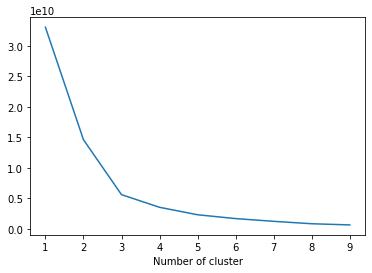

In [253]:
#get k
sse={}
df_cluster = allSamples[['forecast_3_month']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_cluster)
    df_cluster['clusters'] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel('Number of cluster')
plt.show()

In [254]:
#get clusters
kmeans = KMeans(n_clusters=2)
kmeans.fit(allSamples[['forecast_3_month']])
allSamples['forecast_3_month_cluster'] = kmeans.predict(allSamples[['forecast_3_month']])

#order clusters
allSamples = order_cluster('forecast_3_month_cluster', 'forecast_3_month',allSamples,True)

#view clusters
allSamples.groupby('forecast_3_month_cluster').forecast_3_month.describe()

count         mean          std          min  \
forecast_3_month_cluster                                                       
0                        20323.000000   122.035625   782.637500     0.000000   
1                            5.000000 60853.800000 23282.184889 32411.000000   

                                  25%          50%          75%          max  
forecast_3_month_cluster                                                      
0                            0.000000     3.000000    24.000000 27000.000000  
1                        44250.000000 66228.000000 69120.000000 92260.000000

Our k-means analysis seem to be imoacted by outliers in our data.

Let's cap outliers to impact their effect on our analysis and rerun k-means.

In [255]:
#cap outliers
capped_data = cap_data(allSamples, q=.9)

capping the  forecast_3_month
capping the  went_on_backorder_Yes
capping the  forecast_3_month_cluster


In [256]:
#get needed data
capped_data = capped_data[['forecast_3_month', 'went_on_backorder_Yes']]

print(capped_data.shape)

(20328, 2)


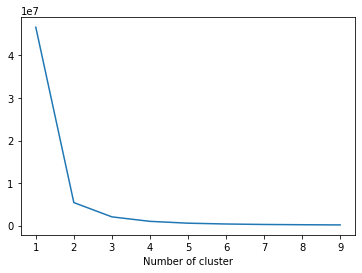

In [257]:
#get k
sse={}
df_cluster = allSamples[['forecast_3_month']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_cluster)
    df_cluster["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [258]:
#get clusters
kmeans = KMeans(n_clusters=2)
kmeans.fit(capped_data[['forecast_3_month']])
capped_data['forecast_3_month_cluster'] = kmeans.predict(capped_data[['forecast_3_month']])

#order clusters
capped_data = order_cluster('forecast_3_month_cluster', 'forecast_3_month',capped_data,True)

#view clusters
capped_data.groupby('forecast_3_month_cluster').forecast_3_month.describe()

count       mean       std       min  \
forecast_3_month_cluster                                               
0                        17438.000000   8.639351 14.716816  0.000000   
1                         2890.000000 137.552595 23.797261 74.000000   

                                25%        50%        75%        max  
forecast_3_month_cluster                                              
0                          0.000000   1.000000  11.000000  73.000000  
1                        131.250000 151.000000 151.000000 151.000000

Much better results.

Note two clusters of three months forecast means are  formed.

Let's visualize backorder rates of the three clusters.

In [259]:
capped_data['forecast_3_month_cluster'] = capped_data['forecast_3_month_cluster'].replace({0:'Low',1:'High'})

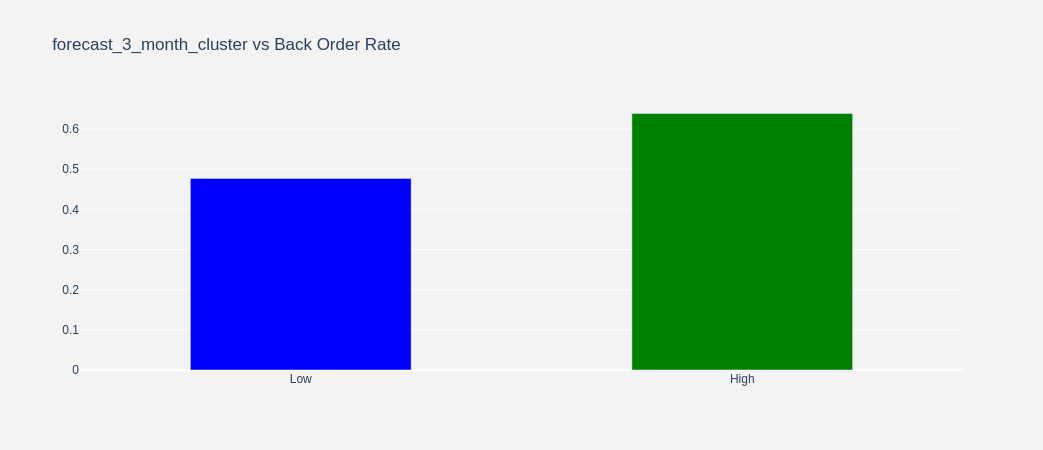

In [260]:
df_plot = capped_data.groupby('forecast_3_month_cluster').went_on_backorder_Yes.mean().reset_index()
plot_data = [
    go.Bar(
        x=df_plot['forecast_3_month_cluster'],
        y=df_plot['went_on_backorder_Yes'],
        width = [0.5, 0.5, 0.5,0.5],
        marker=dict(
        color=['green', 'blue', 'orange','red'])
    )
]

plot_layout = go.Layout(
        xaxis={"type": "category","categoryarray":['Low', 'High']},
        title='forecast_3_month_cluster vs Back Order Rate',
        plot_bgcolor  = "rgb(243,243,243)",
        paper_bgcolor  = "rgb(243,243,243)",
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

Observe higher 3 months forecast tend to backorder more than lower 3 months forecast.

let's get a view of boxplots to get more insights.

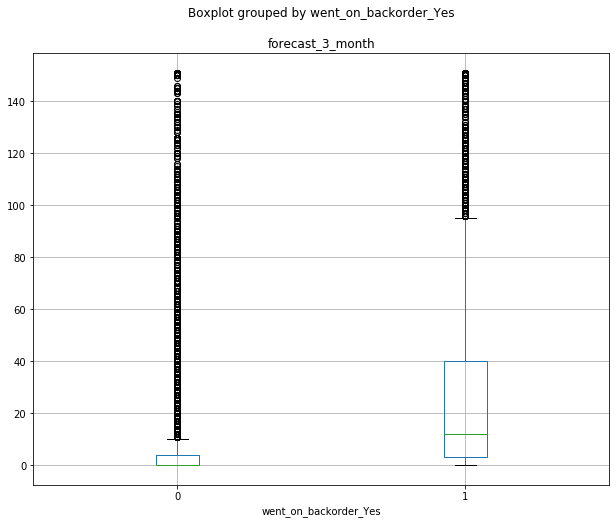

In [261]:
#visualize boxplots
capped_data.boxplot(column='forecast_3_month', by='went_on_backorder_Yes', figsize=(10,8))

We can clearly see that items that went on backorder have a higher median of 3 months forecasts than those that did not.

However, we cannot tell from the boxplots whether the difference we're observing is significant or just by chance.

Let's perform an independent t-test to validate our observations.

We'll start by assessing if our data meet assumptions of the independent t-test.

In [262]:
#We know we have same sized samples because of the adjustments we made above.
#Are the varainces of the two samples equal?
stats.levene(sample_1['forecast_3_month'],sample_2['forecast_3_month'])

LeveneResult(statistic=0.3433459691018606, pvalue=0.5579107092416278)

Levene's test has returned an insignicant t-statistic(p_value>0.05).

We therefore <b/>accept Levene's null hypothesis that the variances of our two groups are the same.</b>

Let's test the normality of residuals.

(array([2.0000e+00, 1.0000e+00, 3.0000e+00, 5.2000e+01, 1.0093e+04,
        1.2000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([-38.2272855 , -29.30005849, -20.37283147, -11.44560446,
         -2.51837744,   6.40884957,  15.33607659,  24.2633036 ,
         33.19053062,  42.11775763,  51.04498465]),
 <a list of 10 Patch objects>)

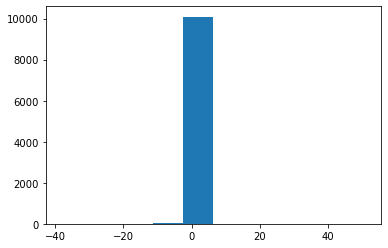

In [263]:
#Get residuals
diff = scale(np.array(sample_1['forecast_3_month']) - np.array(sample_2['forecast_3_month']))

#plot residuals
plt.hist(diff)

The residuals do not appear to follow a gaussian (normal) distribution.

We'll run <b/>Wicloxon-Mann-Whitney  (AKA MannWhitney u)</b> test instead since the assumption for normality of our distributions is not met.

The Wilcoxon-Mann-Whitney Test is <b/>a non-parametric test</b> to assess the differences in means of our data groups. 

Non-parametrics tests assume no underlying distribution of the data.

However, Wilcoxon-Mann-Whitney test assumes equal varainces and therefore we can use it here because Levene's test concluded that our sample variances are equal.

In [264]:
# 1. comfirm equal sample sizes
print(sample_1.shape, sample_2.shape)

(10164, 2) (10164, 2)


In [265]:
# 2.compare samples
stat, p = mannwhitneyu(sample_1['forecast_3_month'],sample_2['forecast_3_month'])

In [266]:
print('Test Statistic: {},'.format(stat),'p_value: {}'.format(p))

Test Statistic: 24834827.5, p_value: 0.0


In [267]:
# 3. interpret test results
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Different distribution (reject H0)


the Wicloxon-Mann-Whitney  has returned a significant test-statistic(p_value<0.05), therefore will reject the null hypothesis that the two means are the same.

This means <b/>forecast_3_month significantly impacts backorder</b>.

We'll make note of these findings and <b/>create an indicator variable 'more_than_mean_forecast_3_month'</b> as higher forecasts appear to backorder more frequently.

## sales_3_month

In [179]:
#get descriptive stats on feature
analysis_df['sales_3_month'].describe()

count   1519073.000000
mean        173.703502
std        5053.650401
min           0.000000
25%           0.000000
50%           1.000000
75%          15.000000
max     1104181.000000
Name: sales_3_month, dtype: float64

About 25% of observations are zeros.

Let's get a dataframe of only the data we need for the analysis

In [180]:
sales_3_month_df = analysis_df[['sales_3_month', 'went_on_backorder_Yes']]

print(sales_3_month_df.shape)

(1519073, 2)


In [181]:
#dropna
sales_3_month_df = sales_3_month_df.dropna(axis=0)

print(sales_3_month_df.shape)

(1519073, 2)


In [182]:
#get samples
sample_1 = sales_3_month_df[(sales_3_month_df['went_on_backorder_Yes'] == 1)]
sample_2 = sales_3_month_df[(sales_3_month_df['went_on_backorder_Yes'] == 0)]

print(sample_1.shape, sample_2.shape)

(10164, 2) (1508909, 2)


In [183]:
#fix sample sizes
sample_2 = sample_2.sample(10164)

print(sample_1.shape, sample_2.shape)

(10164, 2) (10164, 2)


In [184]:
#combine sample dataframes
samples = [sample_1, sample_2]

allSamples = pd.concat(samples)

print(allSamples.shape)

(20328, 2)


In [185]:
allSamples.sample(10)

sales_3_month  went_on_backorder_Yes
1271097       6.000000                      1
813509      327.000000                      0
344054      134.000000                      0
1222030       0.000000                      1
1136513      10.000000                      1
207676        0.000000                      1
1416737       0.000000                      0
904042        7.000000                      0
488872       10.000000                      1
70369        10.000000                      1

Let's perform some <b/>clustering analysis</b> using k_means to see if we can get some data insights

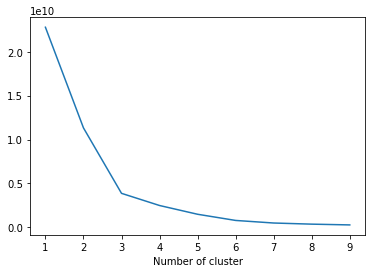

In [186]:
#Get k
sse={}
df_cluster = allSamples[['sales_3_month']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_cluster)
    df_cluster["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [187]:
#get clusters
kmeans = KMeans(n_clusters=2)
kmeans.fit(allSamples[['sales_3_month']])
allSamples['sales_3_month_cluster'] = kmeans.predict(allSamples[['sales_3_month']])

In [188]:
#order clusters
allSamples = order_cluster('sales_3_month_cluster', 'sales_3_month',allSamples,True)

In [189]:
#view clusters
allSamples.groupby('sales_3_month_cluster').sales_3_month.describe()

count          mean        std           min  \
sales_3_month_cluster                                                       
0                     20327.000000    100.210557 753.782382      0.000000   
1                         1.000000 106125.000000        nan 106125.000000   

                                25%           50%           75%           max  
sales_3_month_cluster                                                          
0                          0.000000      4.000000     21.000000  45496.000000  
1                     106125.000000 106125.000000 106125.000000 106125.000000

Our k_mean results seem to be impacted by outliers in our data.

Let's cap the outliers and rerun the clustering analysis.

In [190]:
#cap outliers
capped_data = cap_data(allSamples, q=.9)

capping the  sales_3_month
capping the  went_on_backorder_Yes
capping the  sales_3_month_cluster


In [191]:
#get needed columns
capped_data = capped_data[['sales_3_month', 'went_on_backorder_Yes']]

capped_data.sample(5)

sales_3_month  went_on_backorder_Yes
10356       0.000000                      0
13102       3.000000                      0
5641       14.000000                      1
13799     111.000000                      0
16879       0.000000                      0

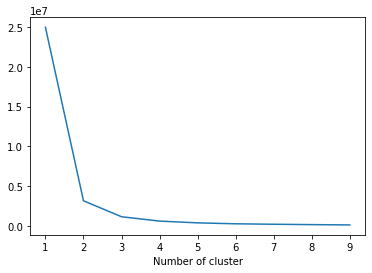

In [192]:
#Get k
sse={}
df_cluster = capped_data[['sales_3_month']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_cluster)
    df_cluster['clusters'] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel('Number of cluster')
plt.show()

In [193]:
#get clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(capped_data[['sales_3_month']])
capped_data['sales_3_month_cluster'] = kmeans.predict(capped_data[['sales_3_month']])

In [194]:
#order clusters
capped_data = order_cluster('sales_3_month_cluster', 'sales_3_month',capped_data,True)

In [195]:
#view clusters
capped_data.groupby('sales_3_month_cluster').sales_3_month.describe()

count       mean       std       min        25%  \
sales_3_month_cluster                                                          
0                     15017.000000   3.756343  5.009138  0.000000   0.000000   
1                      2764.000000  35.962735 13.594792 20.000000  25.000000   
2                      2547.000000 106.831959  9.762298 72.000000 111.000000   

                             50%        75%        max  
sales_3_month_cluster                                   
0                       1.000000   6.000000  19.000000  
1                      32.000000  45.000000  71.000000  
2                     111.000000 111.000000 111.000000

Much better results.

The mean 3 month sales are different for each cluster.

Let's visualize backorder rates among the groups.

In [196]:
capped_data['sales_3_month_cluster'] = capped_data['sales_3_month_cluster'].replace({0:'Low',1:'Mid',2:'High'})

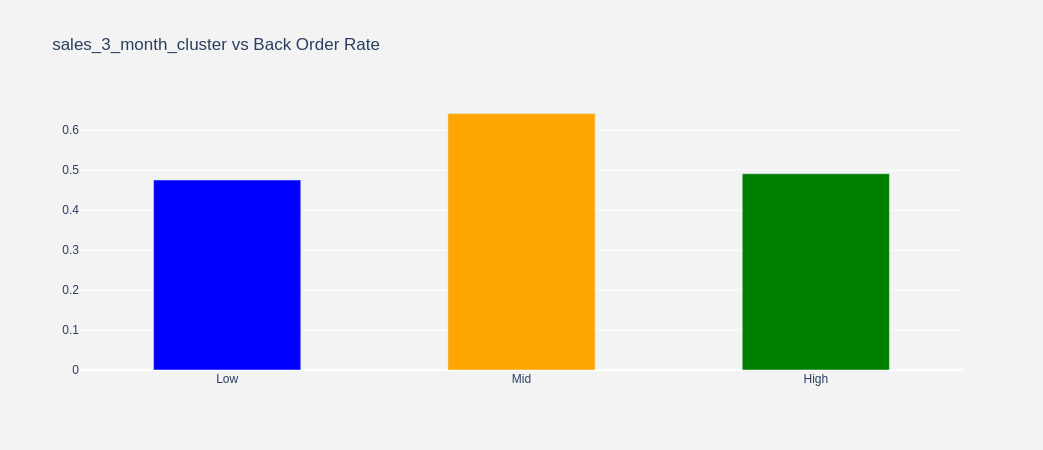

In [197]:
df_plot = capped_data.groupby('sales_3_month_cluster').went_on_backorder_Yes.mean().reset_index()
plot_data = [
    go.Bar(
        x=df_plot['sales_3_month_cluster'],
        y=df_plot['went_on_backorder_Yes'],
        width = [0.5, 0.5, 0.5,0.5],
        marker=dict(
        color=['green', 'blue', 'orange','red'])
    )
]

plot_layout = go.Layout(
        xaxis={"type": "category","categoryarray":['Low','Mid','High']},
        title='sales_3_month_cluster vs Back Order Rate',
        plot_bgcolor  = "rgb(243,243,243)",
        paper_bgcolor  = "rgb(243,243,243)",
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

The backorder rate is all over the place.

sales_3_month might not provide a good signal for backorder.

## pieces_past_due

In [198]:
#get descriptive stats
analysis_df['pieces_past_due'].describe()

count   1519073.000000
mean          2.073364
std         246.217180
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      146496.000000
Name: pieces_past_due, dtype: float64

75% of observations are zeros

Let's get a dataframe of only the data we need for analysis.

In [199]:
#create feature df
pieces_past_due_df = analysis_df[['pieces_past_due', 'went_on_backorder_Yes']]

print(pieces_past_due_df.shape)

(1519073, 2)


In [200]:
#dropna
pieces_past_due_df = pieces_past_due_df.dropna(axis=0)

print(pieces_past_due_df.shape)

(1519073, 2)


In [201]:
#get samples
sample_1 = pieces_past_due_df[(pieces_past_due_df['went_on_backorder_Yes'] == 1)]
sample_2 = pieces_past_due_df[(pieces_past_due_df['went_on_backorder_Yes'] == 0)]

print(sample_1.shape, sample_2.shape)

(10164, 2) (1508909, 2)


In [202]:
#fix sample sizes
sample_2 = sample_2.sample(10164)

print(sample_1.shape, sample_2.shape)

(10164, 2) (10164, 2)


In [203]:
#combine sample dataframes
samples = [sample_1, sample_2]

allSamples = pd.concat(samples)

print(allSamples.shape)

(20328, 2)


In [204]:
allSamples.sample(10)

pieces_past_due  went_on_backorder_Yes
601299          0.000000                      0
397777          0.000000                      0
266545          0.000000                      0
979896          0.000000                      0
219883          0.000000                      0
256318          0.000000                      1
747679          0.000000                      1
1216519         0.000000                      1
1100266         0.000000                      1
60458           0.000000                      0

Let's perform some <b/>clustering analysis</b> using k_means to see if we can get some data insights

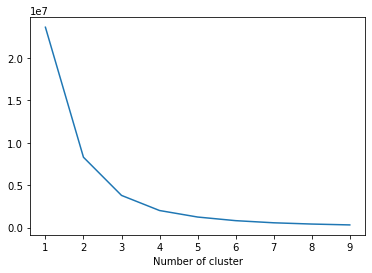

In [205]:
#Get k
sse={}
df_cluster = allSamples[['pieces_past_due']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_cluster)
    df_cluster["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [206]:
#get clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(allSamples[['pieces_past_due']])
allSamples['pieces_past_due_cluster'] = kmeans.predict(allSamples[['pieces_past_due']])

#order clusters
allSamples = order_cluster('pieces_past_due_cluster', 'pieces_past_due',allSamples,True)

#view clusters
allSamples.groupby('pieces_past_due_cluster').pieces_past_due.describe()

count        mean        std         min  \
pieces_past_due_cluster                                                   
0                       20300.000000    1.339015  10.583203    0.000000   
1                          23.000000  530.739130 168.326311  280.000000   
2                           5.000000 1639.200000 473.903682 1242.000000   

                                25%         50%         75%         max  
pieces_past_due_cluster                                                  
0                          0.000000    0.000000    0.000000  243.000000  
1                        422.000000  544.000000  600.000000  880.000000  
2                       1327.000000 1488.000000 1716.000000 2423.000000

Our k_mean results seem to be impacted by outliers in our data.

Let's cap the outliers and rerun the clustering analysis.

In [207]:
#cap outliers
capped_data = cap_data(allSamples, q=.9)

capping the  pieces_past_due
capping the  went_on_backorder_Yes
capping the  pieces_past_due_cluster


In [208]:
#get needed columns
capped_data = capped_data[['pieces_past_due', 'went_on_backorder_Yes']]

capped_data.sample(5)

pieces_past_due  went_on_backorder_Yes
1717          0.000000                      1
8219          0.000000                      1
3260          0.000000                      1
1954          0.000000                      1
17509         0.000000                      0

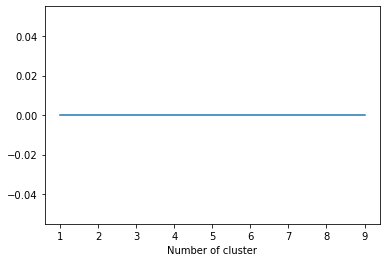

In [209]:
#Get k
sse={}
df_cluster = capped_data[['pieces_past_due']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_cluster)
    df_cluster['clusters'] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel('Number of cluster')
plt.show()

<b/>'pieces_past_due' won't be a useful feature</b> to our model as most observations carry no additional information.

We'll remove this feature from our analysis.

## perf_6_month_avg

In [15]:
#get decsrpitive stats
analysis_df['perf_6_month_avg'].describe()

count   1519073.000000
mean         -6.876925
std          26.564070
min         -99.000000
25%           0.630000
50%           0.820000
75%           0.970000
max           1.000000
Name: perf_6_month_avg, dtype: float64

This feature seems to carry useful information for our model.

Observations marked -99 seem to indicate missing.

Let's view a distribution of the feature's samples to get a better pictures. 

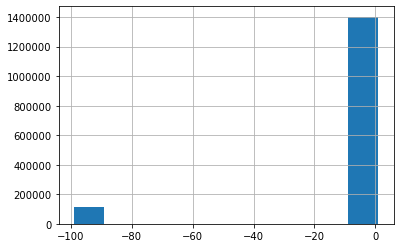

In [78]:
#get histogram
analysis_df['perf_6_month_avg'].hist()

In [79]:
#how many observations are marked -99?
(analysis_df[['perf_6_month_avg']] == -99).sum()

perf_6_month_avg    116604
dtype: int64

In [16]:
#get feature df
perf_6_month_df = analysis_df[['perf_6_month_avg', 'went_on_backorder_Yes']]

print(perf_6_month_df.shape)

(1519073, 2)


In [17]:
#replace -99 with nan for missing
perf_6_month_df = perf_6_month_df[['perf_6_month_avg','went_on_backorder_Yes']].replace(-99,nan)

print(perf_6_month_df.isnull().sum())

perf_6_month_avg         116604
went_on_backorder_Yes         0
dtype: int64


In [18]:
#impute missing with median
perf_6_month_df.fillna(perf_6_month_df.median(), inplace = True)

print(perf_6_month_df.isnull().sum())

perf_6_month_avg         0
went_on_backorder_Yes    0
dtype: int64


In [19]:
#drop -99 observations
#perf_6_month_df = perf_6_month_df[(perf_6_month_df['perf_6_month_avg'] != -99)]

print(perf_6_month_df.shape)

(1519073, 2)


In [20]:
#get samples
sample_1 = perf_6_month_df[(perf_6_month_df['went_on_backorder_Yes'] == 1)]
sample_2 = perf_6_month_df[(perf_6_month_df['went_on_backorder_Yes'] == 0)]

print(sample_1.shape, sample_2.shape)

(10164, 2) (1508909, 2)


In [21]:
#Fix sample sizes
sample_2 = sample_2.sample(10164)

print(sample_1.shape, sample_2.shape)

(10164, 2) (10164, 2)


In [22]:
#Combinesample dataframes
samples = [sample_1, sample_2]

allSamples = pd.concat(samples)

print(allSamples.shape)

(20328, 2)


In [23]:
allSamples.sample(10)

perf_6_month_avg  went_on_backorder_Yes
1221627          0.990000                      0
1498944          0.660000                      1
1436475          0.730000                      1
1091987          0.680000                      1
312456           0.650000                      1
227257           0.990000                      1
875792           0.820000                      0
507588           0.000000                      0
1466481          1.000000                      0
50137            0.780000                      1

Let's perform some <b/>clustering analysis</b> using k_means to see if we can get some data insights

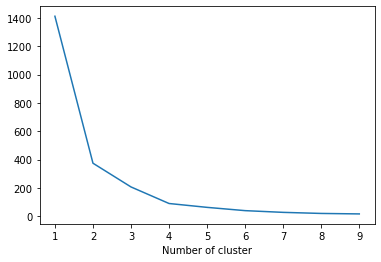

In [24]:
#Get k
sse={}
df_cluster = allSamples[['perf_6_month_avg']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_cluster)
    df_cluster["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [25]:
#get clusters
kmeans = KMeans(n_clusters=4)
kmeans.fit(allSamples[['perf_6_month_avg']])
allSamples['perf_6_month_avg_cluster'] = kmeans.predict(allSamples[['perf_6_month_avg']])

#order clusters
allSamples = order_cluster('perf_6_month_avg_cluster', 'perf_6_month_avg',allSamples,True)

#view clusters
allSamples.groupby('perf_6_month_avg_cluster').perf_6_month_avg.describe()

count     mean      std      min      25%  \
perf_6_month_avg_cluster                                                   
0                        1835.000000 0.094496 0.096141 0.000000 0.000000   
1                        2899.000000 0.499648 0.095009 0.300000 0.420000   
2                        7857.000000 0.782593 0.063105 0.650000 0.730000   
3                        7737.000000 0.962483 0.035473 0.880000 0.940000   

                              50%      75%      max  
perf_6_month_avg_cluster                             
0                        0.070000 0.180000 0.290000  
1                        0.500000 0.580000 0.640000  
2                        0.790000 0.850000 0.870000  
3                        0.970000 0.990000 1.000000

The mean of 6 month performance averages are different for each cluster.

Let's visualize backorder rates among the groups.

In [26]:
allSamples['perf_6_month_avg_cluster'] = allSamples['perf_6_month_avg_cluster']\
.replace({0:'Low',1:'Mid',2:'High', 3: 'Highest'})

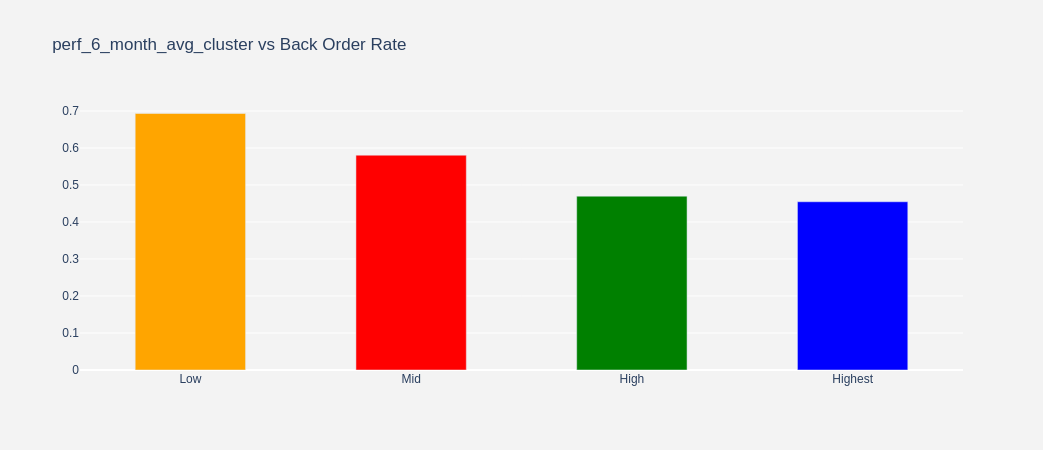

In [27]:
df_plot = allSamples.groupby('perf_6_month_avg_cluster').went_on_backorder_Yes.mean().reset_index()
plot_data = [
    go.Bar(
        x=df_plot['perf_6_month_avg_cluster'],
        y=df_plot['went_on_backorder_Yes'],
        width = [0.5, 0.5, 0.5,0.5],
        marker=dict(
        color=['green', 'blue', 'orange','red'])
    )
]

plot_layout = go.Layout(
        xaxis={"type": "category","categoryarray":['Low','Mid','High','Highest']},
        title='perf_6_month_avg_cluster vs Back Order Rate',
        plot_bgcolor  = "rgb(243,243,243)",
        paper_bgcolor  = "rgb(243,243,243)",
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

We can see below average 6 months performance clusters tend to backorder most.

However, are these differences significant?

Let's perform an independent t-test to confirm.

In [28]:
#We know we have equal sized samples because of the adjustments we made above.
#Are the varainces of the two samples equal?
stats.levene(sample_1['perf_6_month_avg'],sample_2['perf_6_month_avg'])

LeveneResult(statistic=462.1482048101923, pvalue=2.203672979000185e-101)

Levene's test has returned a significant test statistic (p_value < 0.05), meaning that we'll have to <b/>reject Levene's null hypothesis</b> that the variances of our two sample are equal. 

Since our second assumption for performing an independent t-test is not met, any conclussions from the test will not be reliable.

Instead, we'll perform <b/>Welch's t-test.</b>

In [29]:
#Run Welch's test
descriptives, results = rp.ttest(sample_1['perf_6_month_avg'],\
                                          sample_2['perf_6_month_avg'], equal_variances=False)


#Get summary statistics returned by Welch's t-test
descriptives

Variable            N     Mean       SD       SE  95% Conf.  \
0  perf_6_month_avg 10164.000000 0.708419 0.289699 0.002874   0.702786   
1  perf_6_month_avg 10164.000000 0.788771 0.227539 0.002257   0.784347   
2          combined 20328.000000 0.748595 0.263554 0.001849   0.744972   

   Interval  
0  0.714052  
1  0.793195  
2  0.752218

Observe the mean of 6 month performance average is different between backorders and non-backorders.

Let's get our test results.

In [30]:
print(results)

                                      Welch's t-test      results
0  Difference (perf_6_month_avg - perf_6_month_av...    -0.080400
1                              Degrees of freedom =  19245.620700
2                                               t =    -21.990800
3                           Two side test p value =      0.000000
4                          Difference < 0 p value =      0.000000
5                          Difference > 0 p value =      1.000000
6                                       Cohen's d =     -0.308500
7                                       Hedge's g =     -0.308500
8                                   Glass's delta =     -0.277400
9                                               r =      0.156600


Welch's test returned a significant test statistic (p_value < 0.05), meaning we'll reject Welch's test null hypothesis and accept the alternate hypothesis that the means of our two sample are different.

This means <b/> average 6 month performance impacts backorder</b> significantly.

We'll make note of these findings and <b/>create an indicator variable 'less_than_median_6_month_perf_avg' indicator variable</b> during feature engineering. 

## local_bo_qty

In [227]:
#get feature descriptive stats
analysis_df['local_bo_qty'].describe()

count   1519073.000000
mean          0.638019
std          34.564658
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       12530.000000
Name: local_bo_qty, dtype: float64

75% of observations are zeros

let's get a dataframe of needed features

In [228]:
local_bo_df = analysis_df[['local_bo_qty', 'went_on_backorder_Yes']]

print(local_bo_df.shape)

(1519073, 2)


In [229]:
#dropNa
local_bo_df = local_bo_df.dropna(axis=0)

print(local_bo_df.shape)

(1519073, 2)


In [230]:
#get samples
sample_1 = local_bo_df[(local_bo_df['went_on_backorder_Yes'] == 1)]
sample_2 = local_bo_df[(local_bo_df['went_on_backorder_Yes'] == 0)]

sample_1.shape, sample_2.shape

((10164, 2), (1508909, 2))

In [231]:
#fix sample sizes
sample_2 = sample_2.sample(10164)

print(sample_1.shape, sample_2.shape)

(10164, 2) (10164, 2)


In [232]:
#Combinesample dataframes
samples = [sample_1, sample_2]

allSamples = pd.concat(samples)

print(allSamples.shape)

(20328, 2)


In [233]:
allSamples.sample(10)

local_bo_qty  went_on_backorder_Yes
1229136      0.000000                      0
1362525      0.000000                      1
950510       0.000000                      0
587247       0.000000                      1
4624         0.000000                      1
1277411      0.000000                      1
192637       0.000000                      0
419427       0.000000                      1
463448       1.000000                      1
385571       0.000000                      1

Let's perform some <b/>clustering analysis</b> using k_means to see if we can get some data insights

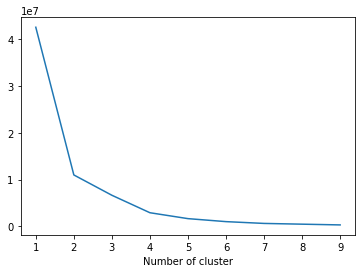

In [234]:
#Get k
sse={}
df_cluster = allSamples[['local_bo_qty']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_cluster)
    df_cluster["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [235]:
#get clusters
kmeans = KMeans(n_clusters=2)
kmeans.fit(allSamples[['local_bo_qty']])
allSamples['local_bo_qty_cluster'] = kmeans.predict(allSamples[['local_bo_qty']])

#order clusters
allSamples = order_cluster('local_bo_qty_cluster', 'local_bo_qty',allSamples,True)

#view clusters
allSamples.groupby('local_bo_qty_cluster').local_bo_qty.describe()

count        mean        std        min  \
local_bo_qty_cluster                                                  
0                    20317.000000    1.586110  16.957988   0.000000   
1                       11.000000 1694.727273 718.016447 873.000000   

                             25%         50%         75%         max  
local_bo_qty_cluster                                                  
0                       0.000000    0.000000    0.000000  740.000000  
1                    1267.000000 1267.000000 1911.000000 2999.000000

Our k_mean results seem to be impacted by outliers in our data.

Let's cap the outliers and rerun the clustering analysis.

In [236]:
capped_data = cap_data(allSamples, q=.9)

capping the  local_bo_qty
capping the  went_on_backorder_Yes
capping the  local_bo_qty_cluster


In [237]:
#get needed columns
capped_data = capped_data[['local_bo_qty', 'went_on_backorder_Yes']]

capped_data.sample(5)

local_bo_qty  went_on_backorder_Yes
13002      0.000000                      0
5801       0.000000                      1
5243       0.000000                      1
3357       0.000000                      1
11216      0.000000                      0

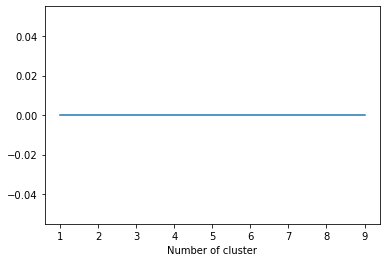

In [238]:
#Get k
sse={}
df_cluster = capped_data[['local_bo_qty']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_cluster)
    df_cluster["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [239]:
#check unique values
capped_data['local_bo_qty'].unique()

array([0.])

<b/>'local_bo_qty' won't be a useful feature</b> to our model as most observations carry no additional information.

We'll remove this feature from our analysis.